**Problem Statement**

Cross-Sell Prediction
Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.


Build a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.



**objective**

predict whether a customer would be interested in Vehicle Insurance or Not.


**Evaluation Metric**

The evaluation metric for this competition is **ROC-AUC Score**


## **Input Variables**

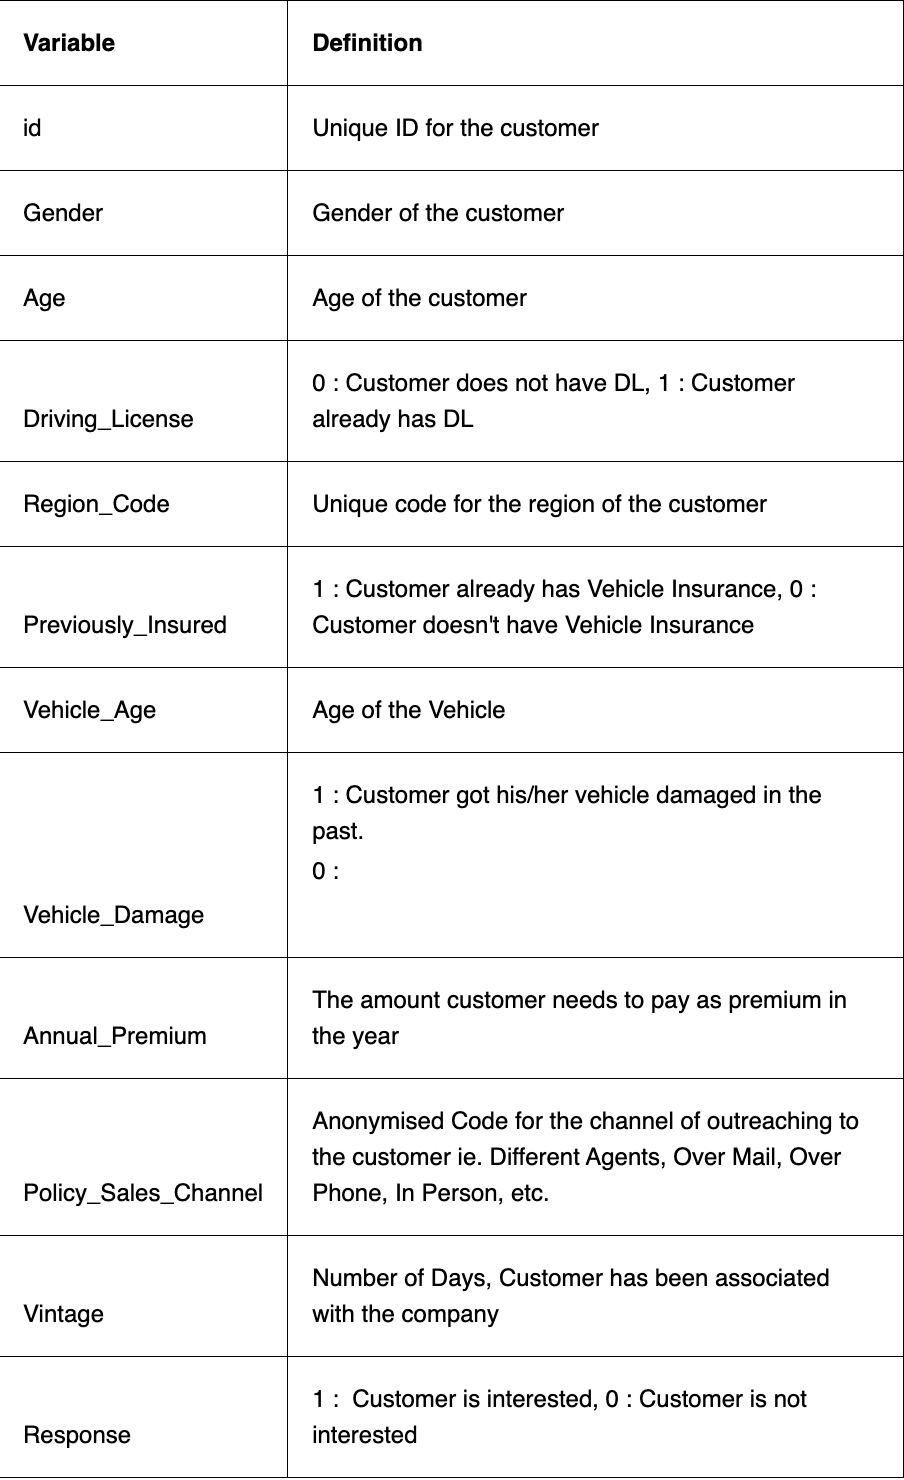

## **Field Description**

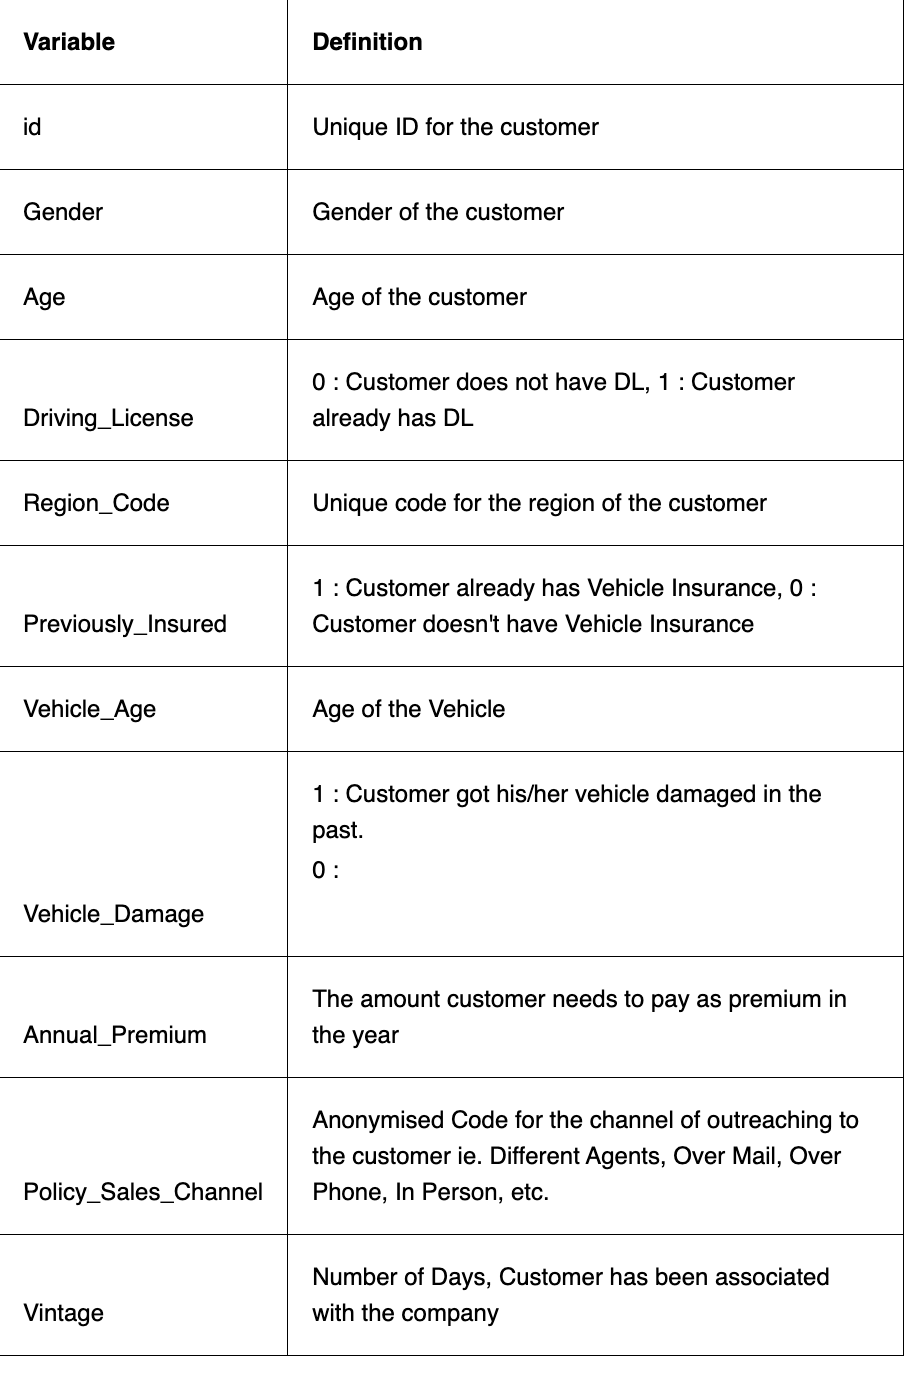


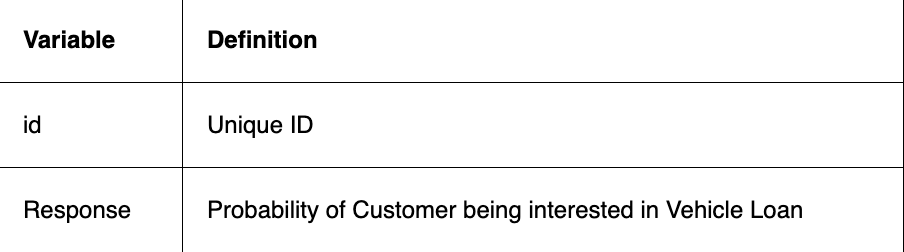

In [520]:
# importing basic libraires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [521]:
# Reading dataset file using pandas
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

### Initial observations of dataset

In [523]:
# to see no.of.cols & rows in the dataset
train.shape,test.shape,submission.shape

((381109, 12), (127037, 11), (127037, 2))

In [524]:
# Train.csv columns
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [525]:
# Test csv columns
test.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [933]:
# Column difference b/w train and test dataset
train.columns.difference(test.columns)

Index(['Response'], dtype='object')

In [941]:
# Datatypes of Train dataset
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

#### **Response** column is the **target** column to be predicted 

In [528]:
# Datatypes of Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [529]:
# Datatypes of Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [1549]:
# Checking null and missing values in train dataset
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [1555]:
#Checking for duplicate Data in the give train dataset
train.duplicated().sum()

0

In [531]:
# Checking null and missing values in test dataset
test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

##### Great both train and test dataset doesn't have any NULL values

In [1056]:
train.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [1058]:
print(train.head(2))

   id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1   Male   44                1         28.0                   0   
1   2   Male   76                1          3.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   

   Response  
0         1  
1         0  


In [534]:
# identifying ignore columns,target column
ign_col = ['id']
tgt_col = ['Response']


In [535]:
train.select_dtypes(include='object').columns

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [536]:
train.select_dtypes(exclude='object').drop(columns=ign_col+tgt_col)

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0        44                1         28.0                   0         40454.0   
1        76                1          3.0                   0         33536.0   
2        47                1         28.0                   0         38294.0   
3        21                1         11.0                   1         28619.0   
4        29                1         41.0                   1         27496.0   
...     ...              ...          ...                 ...             ...   
381104   74                1         26.0                   1         30170.0   
381105   30                1         37.0                   1         40016.0   
381106   21                1         30.0                   1         35118.0   
381107   68                1         14.0                   0         44617.0   
381108   46                1         29.0                   0         41777.0   

        Policy_Sales_Channel  Vintage  
0                       26.0      217  
1                       26.0      183  
2                       26.0       27  
3                      152.0      203  
4                      152.0       39  
...                      ...      ...  
381104                  26.0       88  
381105                 152.0      131  
381106                 160.0      161  
381107                 124.0       74  
381108                  26.0      237  

[381109 rows x 7 columns]

In [537]:
# identifying  category cols and numerical cols

# category cols
cat_cols = train.select_dtypes(include='object').columns
cat_cols

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

In [538]:
# numeric cols
num_cols = train.select_dtypes(exclude='object').drop(columns=ign_col+tgt_col).columns
num_cols

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [539]:
train[cat_cols].head()

Gender Vehicle_Age Vehicle_Damage
0    Male   > 2 Years            Yes
1    Male    1-2 Year             No
2    Male   > 2 Years            Yes
3    Male    < 1 Year             No
4  Female    < 1 Year             No

In [540]:
train[num_cols].head()

Age  Driving_License  Region_Code  Previously_Insured  Annual_Premium  \
0   44                1         28.0                   0         40454.0   
1   76                1          3.0                   0         33536.0   
2   47                1         28.0                   0         38294.0   
3   21                1         11.0                   1         28619.0   
4   29                1         41.0                   1         27496.0   

   Policy_Sales_Channel  Vintage  
0                  26.0      217  
1                  26.0      183  
2                  26.0       27  
3                 152.0      203  
4                 152.0       39

In [541]:
train[cat_cols].shape

(381109, 3)

In [542]:
train[num_cols].shape

(381109, 7)

In [543]:
num_cols

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [1158]:
# type(num_cols)

In [1160]:
# num_col_list= tolist(num_cols)

In [1162]:
# type(num_col_list)

In [1164]:
# cat_cols

In [1166]:
feature_cols = list(cat_cols)+list(num_cols)

In [549]:
train[feature_cols].head()

Gender Vehicle_Age Vehicle_Damage  Age  Driving_License  Region_Code  \
0    Male   > 2 Years            Yes   44                1         28.0   
1    Male    1-2 Year             No   76                1          3.0   
2    Male   > 2 Years            Yes   47                1         28.0   
3    Male    < 1 Year             No   21                1         11.0   
4  Female    < 1 Year             No   29                1         41.0   

   Previously_Insured  Annual_Premium  Policy_Sales_Channel  Vintage  
0                   0         40454.0                  26.0      217  
1                   0         33536.0                  26.0      183  
2                   0         38294.0                  26.0       27  
3                   1         28619.0                 152.0      203  
4                   1         27496.0                 152.0       39

In [1184]:
# ValueCount details for both selected numerical & categorical columns

for col in train[feature_cols].columns:
    print(col,'-->',train[col].nunique())
    print('Unique values:\n',train[col].unique())
    col_uniq_count = train[col].nunique()
    # print(col_uniq_count)
    if col_uniq_count <= 5:
        print (train[col].value_counts())
    print("*************************************************************************\n")

Gender --> 2
Unique values:
 ['Male' 'Female']
Gender
Male      206089
Female    175020
Name: count, dtype: int64
*************************************************************************

Vehicle_Age --> 3
Unique values:
 ['> 2 Years' '1-2 Year' '< 1 Year']
Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64
*************************************************************************

Vehicle_Damage --> 2
Unique values:
 ['Yes' 'No']
Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64
*************************************************************************

Age --> 66
Unique values:
 [44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]
*************************************************************************

Driving_License --> 2
Unique values:
 [1 0]
Driving_License
1    38029

In [1178]:
# # ValueCount details for num_cols

# for col in train[num_cols].columns:
#     print(col,'-->',train[col].nunique())
#     print('Available Values:\n',train[col].unique())
#     if col in ('Driving_License','Previously_Insured'):
#         print (train[col].value_counts())
#     print("**************************************************************")

In [1180]:
# # ValueCount details for cat_cols

# for col in train[cat_cols].columns:
#     print(col,'-->',train[col].nunique())
#     print(train[col].unique())
#     print (train[col].value_counts())

In [1196]:
#observing description statistics of Numerical columns
train[num_cols].describe()

Age  Driving_License    Region_Code  Previously_Insured  \
count  381109.000000    381109.000000  381109.000000       381109.000000   
mean       38.822584         0.997869      26.388807            0.458210   
std        15.511611         0.046110      13.229888            0.498251   
min        20.000000         0.000000       0.000000            0.000000   
25%        25.000000         1.000000      15.000000            0.000000   
50%        36.000000         1.000000      28.000000            0.000000   
75%        49.000000         1.000000      35.000000            1.000000   
max        85.000000         1.000000      52.000000            1.000000   

       Annual_Premium  Policy_Sales_Channel        Vintage  
count   381109.000000         381109.000000  381109.000000  
mean     30564.389581            112.034295     154.347397  
std      17213.155057             54.203995      83.671304  
min       2630.000000              1.000000      10.000000  
25%      24405.000000             29.000000      82.000000  
50%      31669.000000            133.000000     154.000000  
75%      39400.000000            152.000000     227.000000  
max     540165.000000            163.000000     299.000000

#### From the above Stats we can see/observe there is no much deviation b/w Mean and Median.. (i.e.) That there is No or less Outliers exist in the dataset

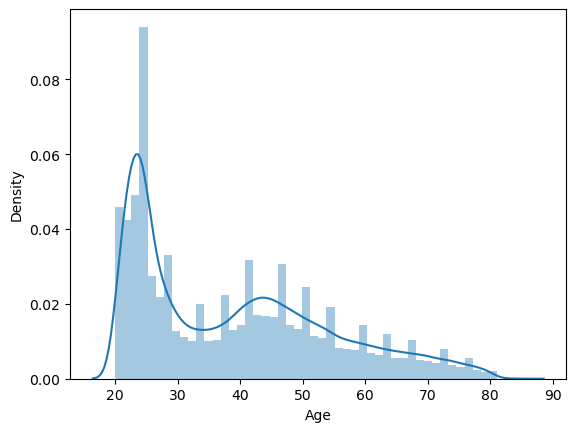

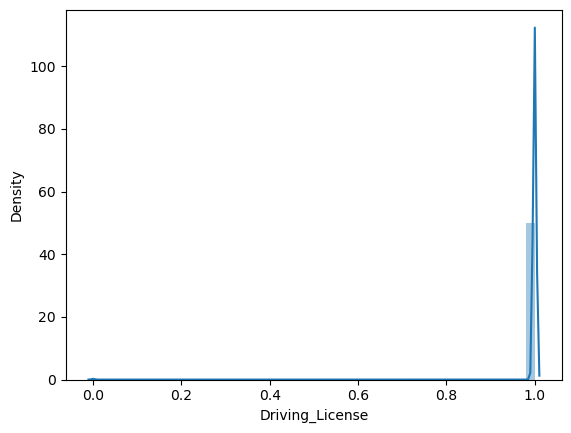

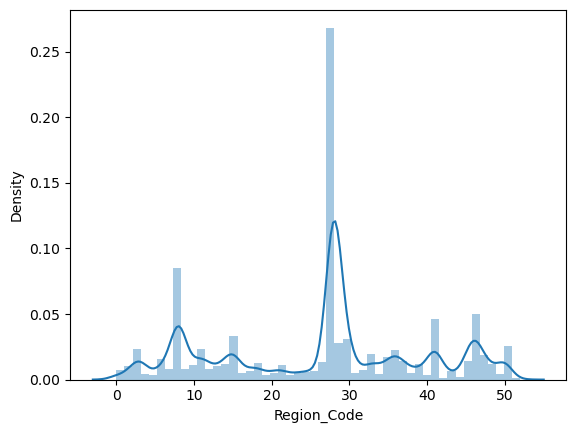

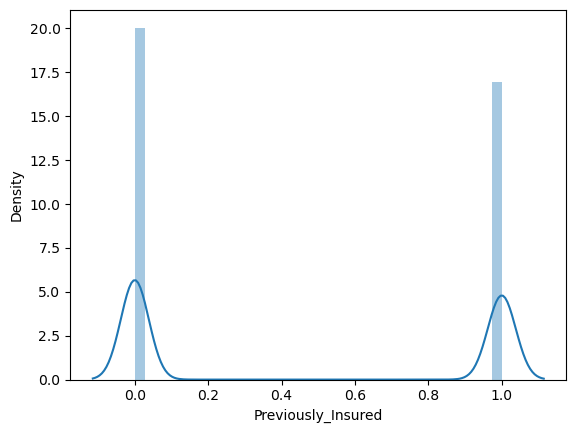

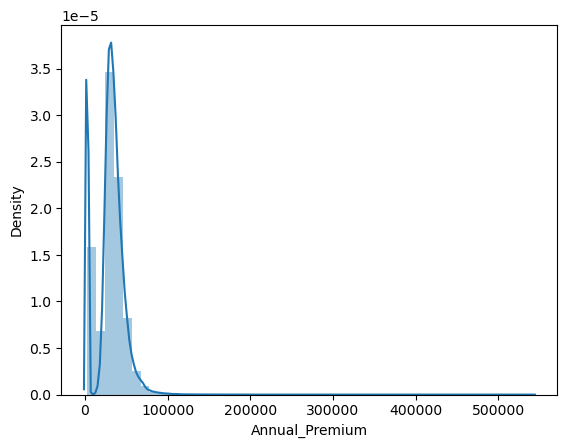

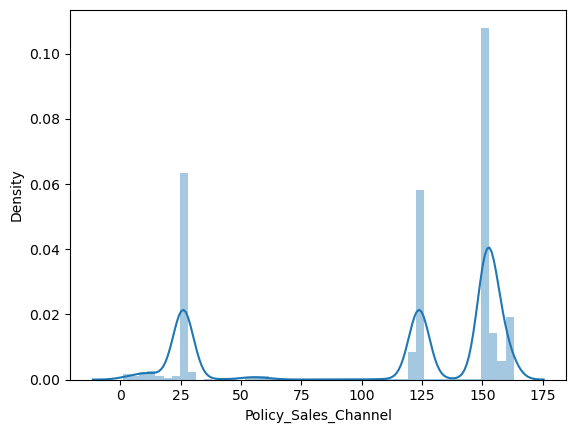

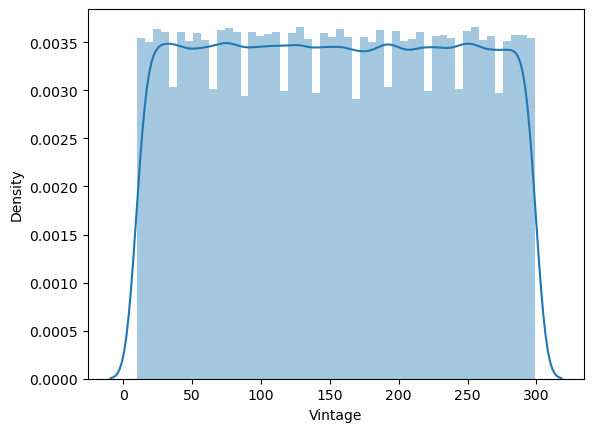

In [1203]:
for col in train[num_cols].columns:
    sns.distplot(train[col])
    plt.show()

### Observation from Dist-plot
#### Age - Column
##### Age is right skewed and insurer start from 20 and goes upto 85,but majority lies b/w 20 and less 30

#### Driving_License - Column
##### Holds binary values either 0/1 and majority of the consumer hold driving license

#### Annual_Premium - Column
##### Annual_Premium starts from 2.6K and goes upto 540K, but majority lies within range of 2.6K and goes upto 90K


In [1208]:
#observing description statistics of Categorical columns
train[cat_cols].describe()

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

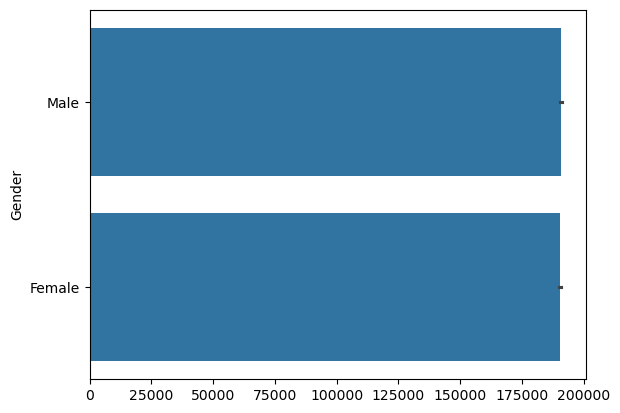

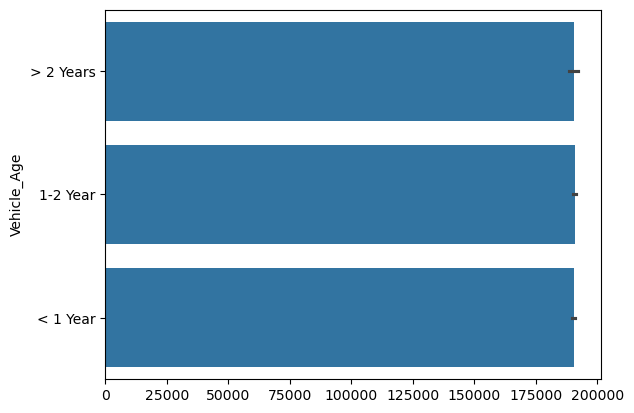

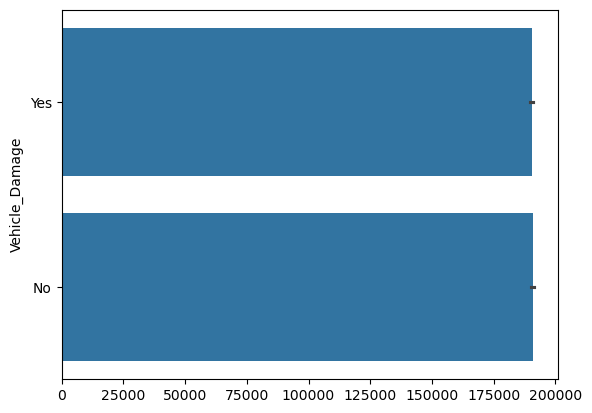

In [1214]:
for col in train[cat_cols].columns:
    sns.barplot(train[col])
    plt.show()

### Almost all the categorical values are evenly distributed. No skewness observed.

In [1218]:
train.drop(columns=ign_col).drop(columns=cat_cols).corr()

Age  Driving_License  Region_Code  \
Age                   1.000000        -0.079782     0.042574   
Driving_License      -0.079782         1.000000    -0.001081   
Region_Code           0.042574        -0.001081     1.000000   
Previously_Insured   -0.254682         0.014969    -0.024659   
Annual_Premium        0.067507        -0.011906    -0.010588   
Policy_Sales_Channel -0.577826         0.043731    -0.042420   
Vintage              -0.001264        -0.000848    -0.002750   
Response              0.111147         0.010155     0.010570   

                      Previously_Insured  Annual_Premium  \
Age                            -0.254682        0.067507   
Driving_License                 0.014969       -0.011906   
Region_Code                    -0.024659       -0.010588   
Previously_Insured              1.000000        0.004269   
Annual_Premium                  0.004269        1.000000   
Policy_Sales_Channel            0.219381       -0.113247   
Vintage                         0.002537       -0.000608   
Response                       -0.341170        0.022575   

                      Policy_Sales_Channel   Vintage  Response  
Age                              -0.577826 -0.001264  0.111147  
Driving_License                   0.043731 -0.000848  0.010155  
Region_Code                      -0.042420 -0.002750  0.010570  
Previously_Insured                0.219381  0.002537 -0.341170  
Annual_Premium                   -0.113247 -0.000608  0.022575  
Policy_Sales_Channel              1.000000  0.000002 -0.139042  
Vintage                           0.000002  1.000000 -0.001050  
Response                         -0.139042 -0.001050  1.000000

In [556]:
sns.__version__

'0.13.2'

In [557]:
sys.path.append('/opt/anaconda3/envs/myenv/lib/python3.12/site-packages')

<Axes: >

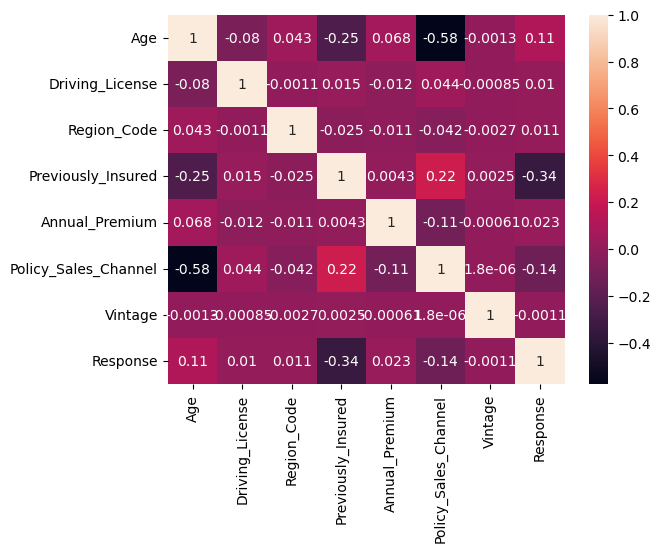

In [1256]:
# Understanding correlation b/w input features and target
sns.heatmap(train.drop(columns=ign_col).drop(columns=cat_cols).corr(),annot=True)

### Fields which have high correlation with Target(Response)
#### Previously_Insured,Policy_Sales_Channel,Age

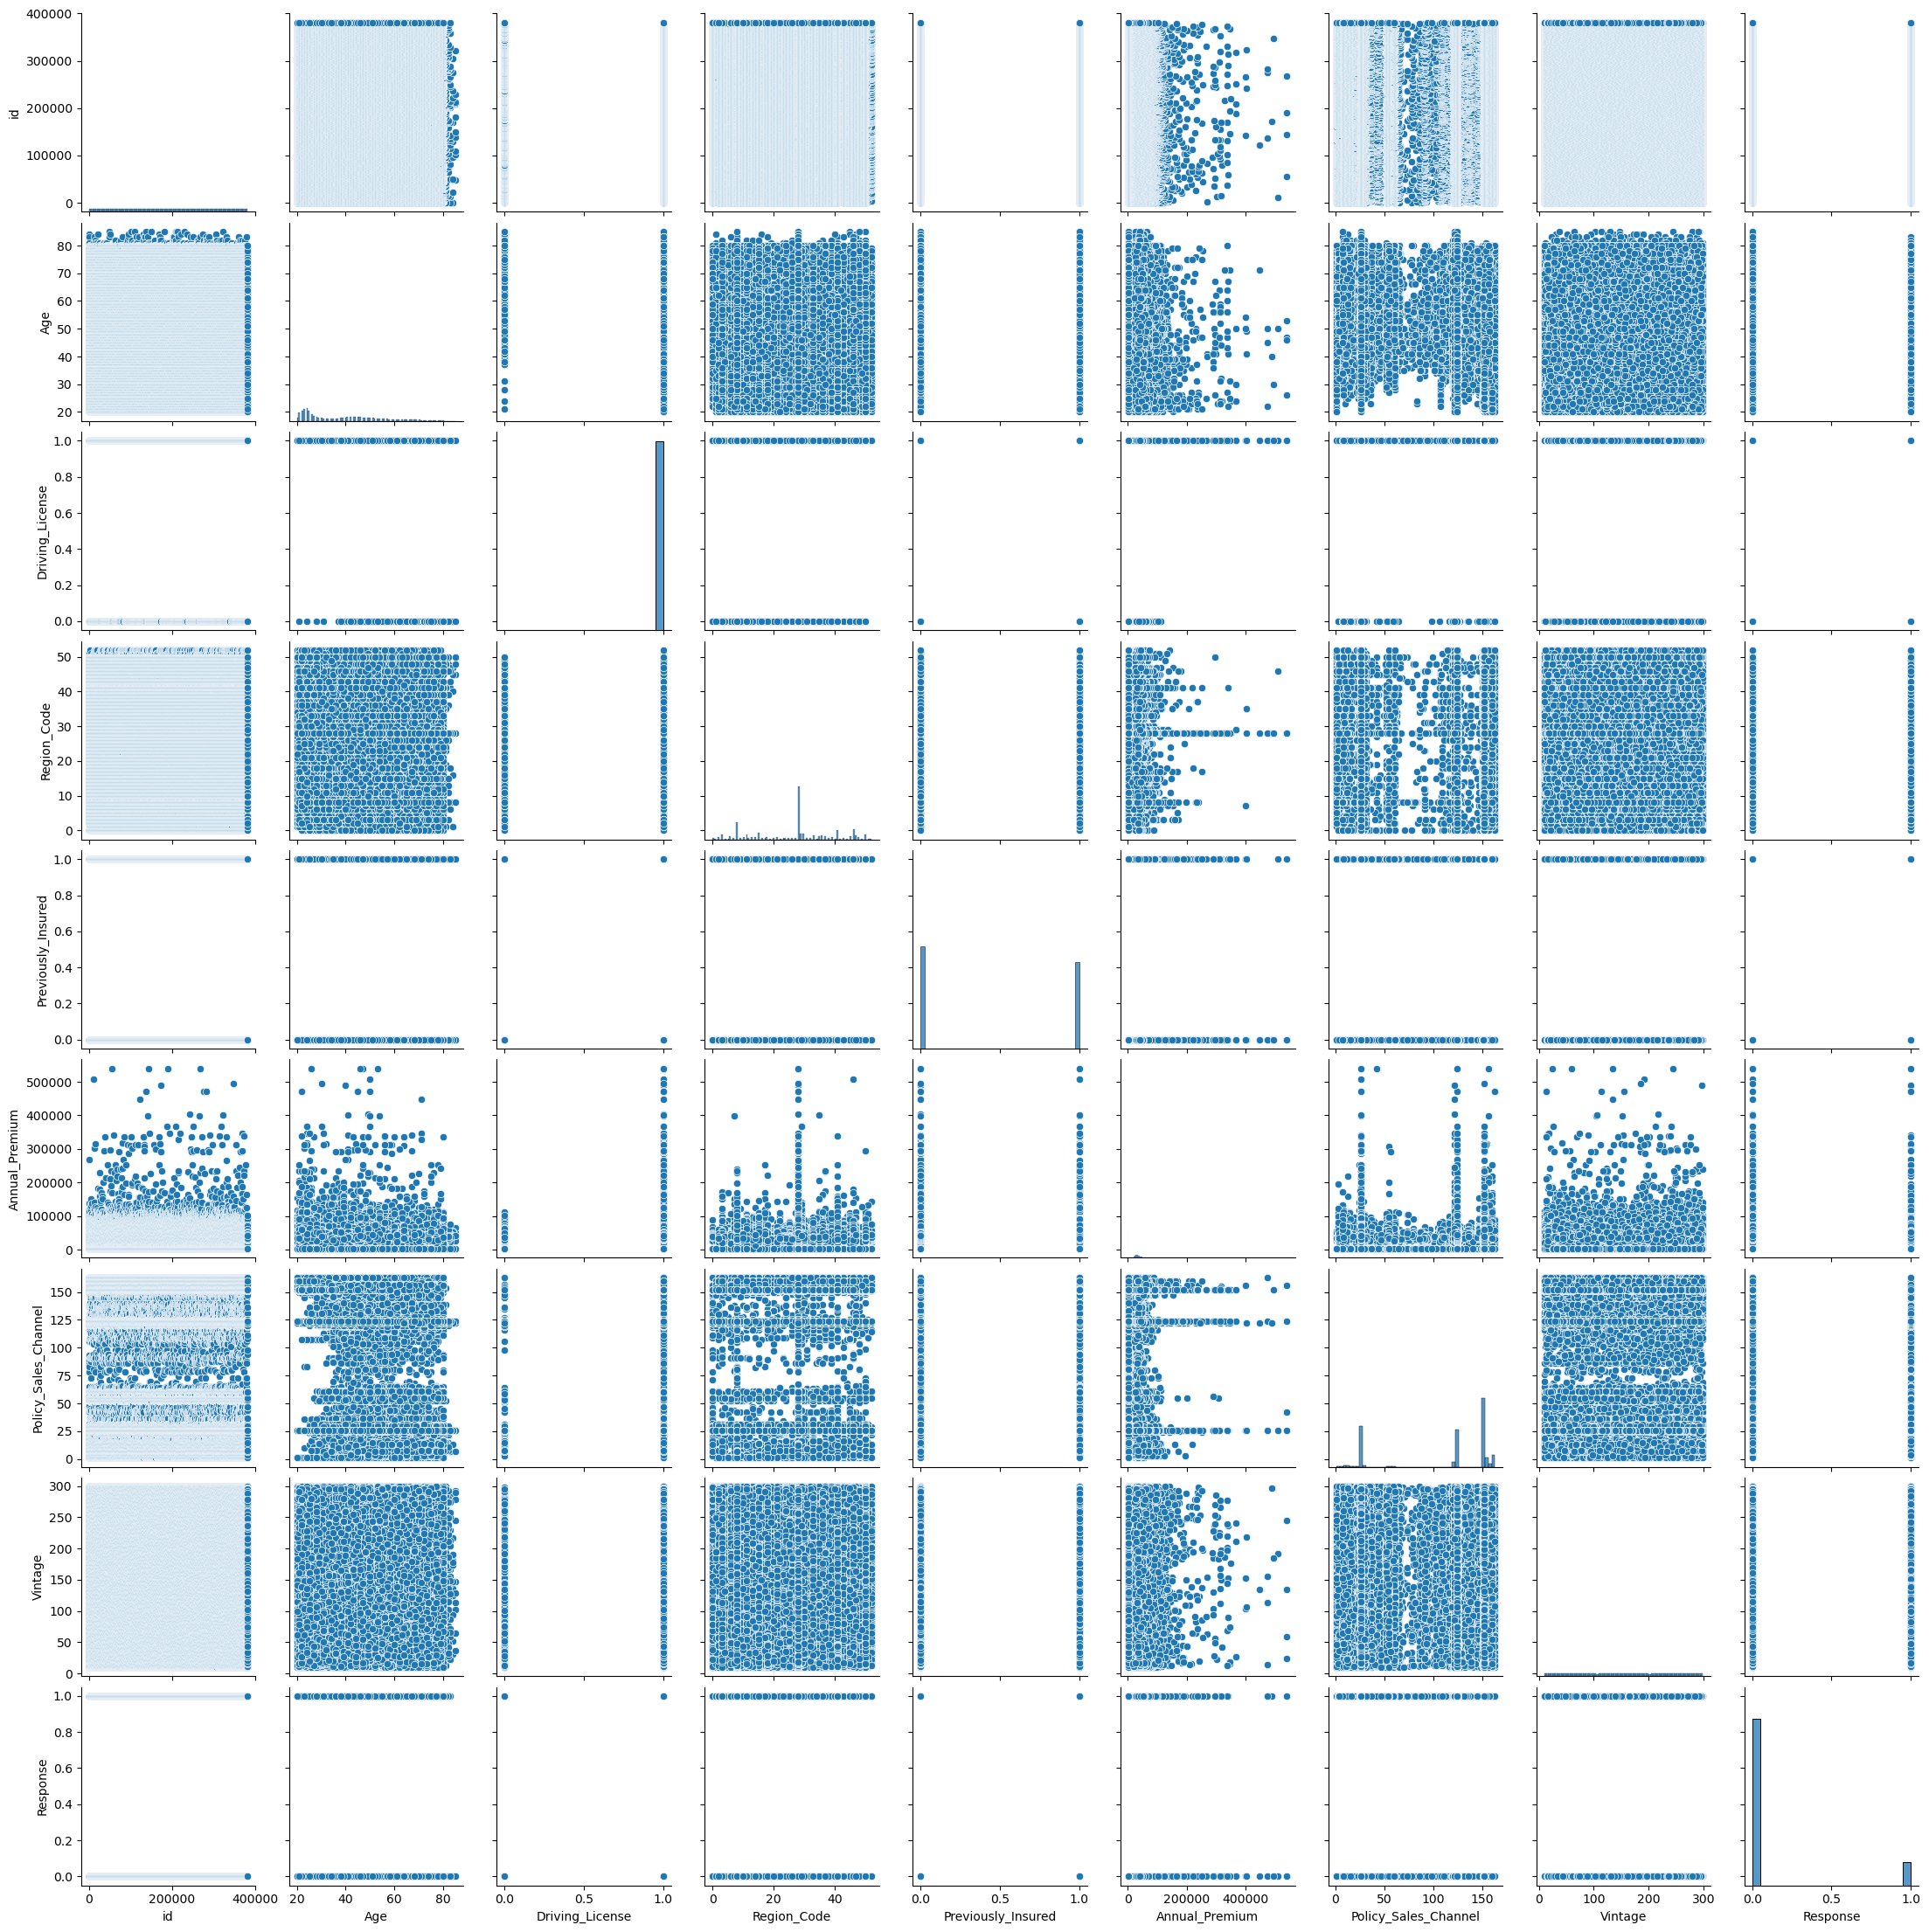

In [1259]:
# Observation the data distrobution
sns.pairplot(train)

In [1278]:
# Converting all the fields(input columns) to numerical cols to understand correlation b/w input features and target 
gender = {'Male':0,'Female':1}
v_age = {'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}
v_damage = {'No':0,'Yes':1} 

New_X=train.drop(columns='id')

New_X['Gender']=New_X['Gender'].map(gender)
New_X['Vehicle_Age']=New_X['Vehicle_Age'].map(v_age)
New_X['Vehicle_Damage']=New_X['Vehicle_Damage'].map(v_damage)

New_X['Response']=y

New_X.head(2)

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       0   44                1         28.0                   0            3   
1       0   76                1          3.0                   0            2   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0               1         40454.0                  26.0      217         1  
1               0         33536.0                  26.0      183         0

In [1280]:
New_X.corr()

Gender       Age  Driving_License  Region_Code  \
Gender                1.000000 -0.145545         0.018374    -0.000604   
Age                  -0.145545  1.000000        -0.079782     0.042574   
Driving_License       0.018374 -0.079782         1.000000    -0.001081   
Region_Code          -0.000604  0.042574        -0.001081     1.000000   
Previously_Insured    0.081932 -0.254682         0.014969    -0.024659   
Vehicle_Age          -0.160427  0.765790        -0.037306     0.043778   
Vehicle_Damage       -0.091606  0.267534        -0.016622     0.028235   
Annual_Premium       -0.003673  0.067507        -0.011906    -0.010588   
Policy_Sales_Channel  0.111159 -0.577826         0.043731    -0.042420   
Vintage               0.002517 -0.001264        -0.000848    -0.002750   
Response             -0.052440  0.111147         0.010155     0.010570   

                      Previously_Insured  Vehicle_Age  Vehicle_Damage  \
Gender                          0.081932    -0.160427       -0.091606   
Age                            -0.254682     0.765790        0.267534   
Driving_License                 0.014969    -0.037306       -0.016622   
Region_Code                    -0.024659     0.043778        0.028235   
Previously_Insured              1.000000    -0.380873       -0.824143   
Vehicle_Age                    -0.380873     1.000000        0.396873   
Vehicle_Damage                 -0.824143     0.396873        1.000000   
Annual_Premium                  0.004269     0.041580        0.009349   
Policy_Sales_Channel            0.219381    -0.550663       -0.224377   
Vintage                         0.002537    -0.001892       -0.002064   
Response                       -0.341170     0.221874        0.354400   

                      Annual_Premium  Policy_Sales_Channel   Vintage  Response  
Gender                     -0.003673              0.111159  0.002517 -0.052440  
Age                         0.067507             -0.577826 -0.001264  0.111147  
Driving_License            -0.011906              0.043731 -0.000848  0.010155  
Region_Code                -0.010588             -0.042420 -0.002750  0.010570  
Previously_Insured          0.004269              0.219381  0.002537 -0.341170  
Vehicle_Age                 0.041580             -0.550663 -0.001892  0.221874  
Vehicle_Damage              0.009349             -0.224377 -0.002064  0.354400  
Annual_Premium              1.000000             -0.113247 -0.000608  0.022575  
Policy_Sales_Channel       -0.113247              1.000000  0.000002 -0.139042  
Vintage                    -0.000608              0.000002  1.000000 -0.001050  
Response                    0.022575             -0.139042 -0.001050  1.000000

<Axes: >

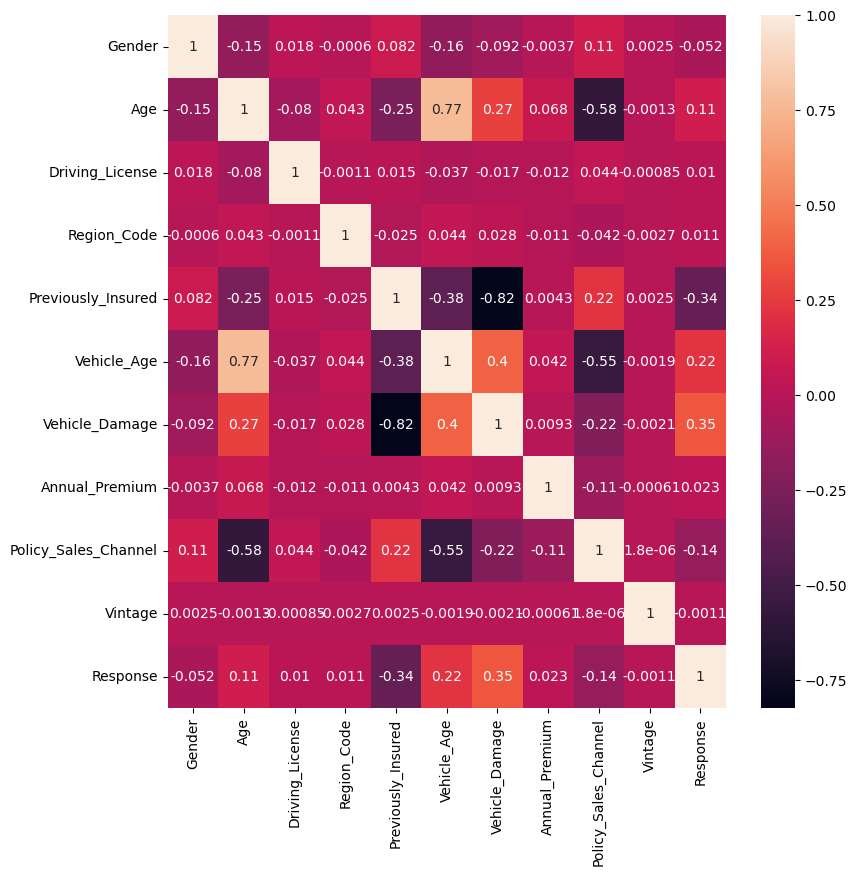

In [1284]:
plt.figure(figsize=(9,9))
sns.heatmap(New_X.corr(),annot=True)

### Fields which have high correlation with Target(Response)
#### Vehicle_Damage,Previously_Insured,Vehicle_Age,Policy_Sales_Channel,Age

## Preceeding with preprocessing,pipeline creation and Model building

In [670]:
# importing preprocessing,pipeline and ML libraires

from sklearn.preprocessing import OneHotEncoder,StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,auc,classification_report,f1_score,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [1274]:

#Categorical pipeline:

cat_pipe_encode = Pipeline(steps=[
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # Applying OneHot Encoding
])

#Numerical pipeline:
num_pipe_encode = Pipeline(steps=[
    ('scale',StandardScaler())# Applying Standard Scaling
])

In [1288]:
# Create pipeline b/w pipeline & columns

preprocess = ColumnTransformer(transformers=[
    ('cat_encode',cat_pipe_encode,cat_cols), # Categorical col mapping with cat_pipe_encode pipeline
    ('num_encode',num_pipe_encode,num_cols) # numerical col mapping with num_pipe_encode pipeline
])

In [1290]:
# Assigning ML - Algorithm to a variable
mymodel = LogisticRegression()

In [1294]:
# Incorporating Preprocessing and ML-Modeling into a one-single pipeline.
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
])

In [1296]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('mlmodel', LogisticRegression())])

In [1276]:
# Segreating X & y cols 
X = train.drop(columns=ign_col+tgt_col)
X.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0    Male   44                1         28.0                   0   > 2 Years   
1    Male   76                1          3.0                   0    1-2 Year   
2    Male   47                1         28.0                   0   > 2 Years   
3    Male   21                1         11.0                   1    < 1 Year   
4  Female   29                1         41.0                   1    < 1 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0            Yes         40454.0                  26.0      217  
1             No         33536.0                  26.0      183  
2            Yes         38294.0                  26.0       27  
3             No         28619.0                 152.0      203  
4             No         27496.0                 152.0       39

In [768]:
y=train['Response']

In [770]:
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [772]:
train_X.shape,val_X.shape,train_y.shape,val_y.shape

((304887, 10), (76222, 10), (304887,), (76222,))

In [1300]:
# fitting model
model_pipeline.fit(train_X,train_y)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('mlmodel', LogisticRegression())])

In [1304]:
# Getting cloumn names post preprocessing
model_pipeline.named_steps['preprocess'].named_transformers_['cat_encode'].get_feature_names_out(input_features=cat_cols)

array(['Gender_Female', 'Gender_Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_No', 'Vehicle_Damage_Yes'], dtype=object)

In [1306]:
# Prediction using the ML-model - Sample prediction 
pred_train=model_pipeline.predict(train_X)
pred_test=model_pipeline.predict(val_X)

In [784]:
print(classification_report(train_y,pred_train))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    267700
           1       0.46      0.00      0.00     37187

    accuracy                           0.88    304887
   macro avg       0.67      0.50      0.47    304887
weighted avg       0.83      0.88      0.82    304887



In [786]:
print ('Train f1 score:',f1_score(train_y,pred_train))
print ('Test  f1 score:',f1_score(val_y,pred_test))

Train f1 score: 0.0003225806451612903
Test  f1 score: 0.0


In [1308]:
# train_X.columns

In [1310]:
# test.columns

In [1312]:
# model_pipeline.predict(test)

In [792]:
submission.columns

Index(['id', 'Response'], dtype='object')

In [794]:
submission['Response']=model_pipeline.predict(test)

In [1314]:
submission.head(3)

id  Response
0  381110         0
1  381111         1
2  381112         1

In [798]:
# submission.to_csv('Logistic_reg_submission.csv',index=False)

In [804]:
# Creating submission.csv file from simple Logistic model
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/Logistic_reg_submission.csv',index=False)

In [1330]:
# Creating a model-evaluation function for reusablity 
def model_eval(train_X,val_X,train_y,val_y,model): # input arguments
    model.fit(train_X,train_y) # Model fitting 
    train_pred=model.predict(train_X) # Model prediction on train_X -> Train sample
    val_pred=model.predict(val_X) # Model prediction on val_X  -> Validation sample
    
    # Calculating confusion_matrix for Train & Validation samples
    print('Train Confusion-matrix:\n',confusion_matrix(train_y,train_pred))
    print('\nTest Confusion-matrix :\n',confusion_matrix(val_y,val_pred),'\n')
    
    # Calculating classification_report for Train & Validation samples
    print('Train Classification-report:\n',classification_report(train_y,train_pred))
    print('\nTest Classification-report :\n',classification_report(val_y,val_pred),'\n')

    # Calculating accuracy_score for Train & Validation samples
    print('Train Accuracy-Score:',accuracy_score(train_y,train_pred))
    print('Test Accuracy-Score :',accuracy_score(val_y,val_pred),'\n')

    # Calculating ROC AUC SCORE for Train & Validation samples - Actual Metrics for this Hackathon
    print('Train ROC AUC SCORE:',roc_auc_score(train_y,train_pred))
    print('Test ROC AUC SCORE :',roc_auc_score(val_y,val_pred),'\n')

    # Calculating f1_score for Train & Validation samples
    print('Train F1 SCORE:',f1_score(train_y,train_pred))
    print('Test F1 SCORE :',f1_score(val_y,val_pred),'\n')
    print()
    
    # Curve based on 0 predict_proba
    print ('\nROC-Curve for 0')
    y_pred_proba = model.predict_proba(val_X)[:,0]
    plt.figure()
    fpr,tpr,thrsh = roc_curve(val_y,y_pred_proba)
    roc_auc = auc (fpr,tpr)
    print()
    plt.plot(fpr,tpr)
    plt.show()
    
    # Curve based on 1 predict_proba
    print ('\nROC-Curve for 1')
    y_pred_proba = model.predict_proba(val_X)[:,1]
    plt.figure()
    fpr,tpr,thrsh = roc_curve(val_y,y_pred_proba)
    roc_auc = auc (fpr,tpr)
    print()
    plt.plot(fpr,tpr)
    plt.show()
    

In [1320]:
# y_pred_proba = model_pipeline.predict_proba(val_X)[:,0]
# y_pred_proba

In [1322]:
# roc_curve(val_y,y_pred_proba)

Train Confusion-matrix:
 [[267693      7]
 [ 37181      6]]

Test Confusion-matrix :
 [[66699     0]
 [ 9523     0]] 

Train Classification-report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94    267700
           1       0.46      0.00      0.00     37187

    accuracy                           0.88    304887
   macro avg       0.67      0.50      0.47    304887
weighted avg       0.83      0.88      0.82    304887


Test Classification-report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222
 

Train Accuracy-Score: 0.8780269411290085
Test Accuracy-Score : 0.8750623179659416 

Train ROC AUC SCORE: 0.500067599016647
Test ROC AUC SCORE : 0.5 

Train F1 SCORE

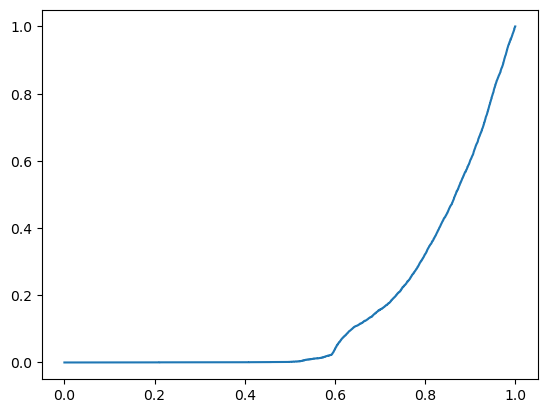


ROC-Curve for 1



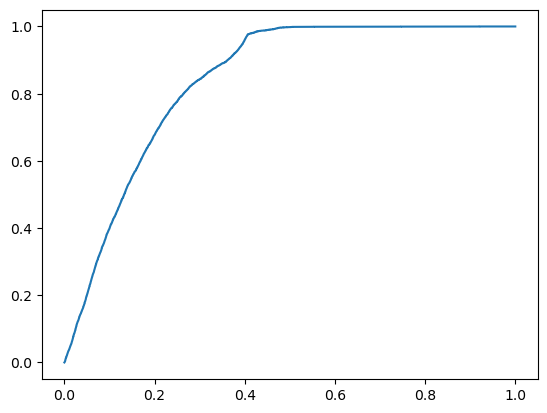

CPU times: user 1.02 s, sys: 184 ms, total: 1.2 s
Wall time: 1.47 s


In [1342]:
%%time
mymodel = LogisticRegression()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [1344]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/Logis_Reg_submission.csv',index=False)

## LogisticRegression submission score
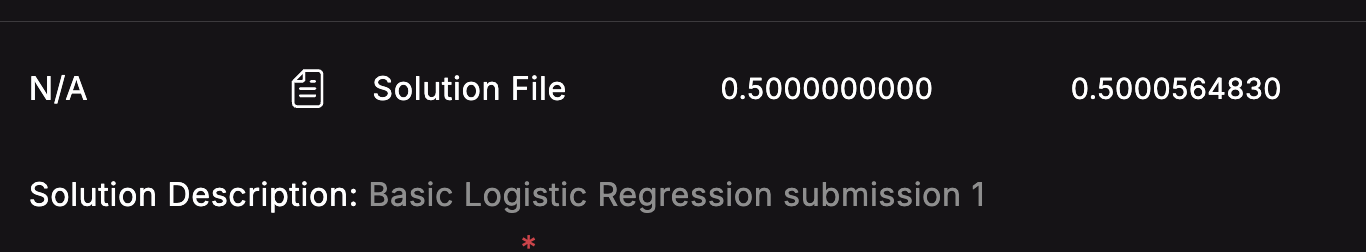

Train Confusion-matrix:
 [[267700      0]
 [    35  37152]]

Test Confusion-matrix :
 [[59691  7008]
 [ 6611  2912]] 

Train Classification-report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    267700
           1       1.00      1.00      1.00     37187

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887


Test Classification-report :
               precision    recall  f1-score   support

           0       0.90      0.89      0.90     66699
           1       0.29      0.31      0.30      9523

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222
 

Train Accuracy-Score: 0.9998852033704291
Test Accuracy-Score : 0.8213245519666238 

Train ROC AUC SCORE: 0.999529405437384
Test ROC AUC SCORE : 0.6003584751472192 


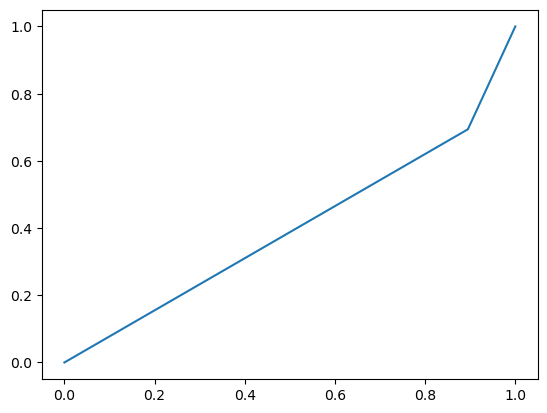


ROC-Curve for 1



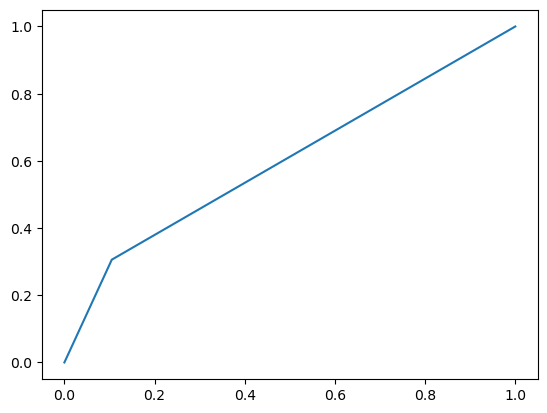

CPU times: user 2.01 s, sys: 128 ms, total: 2.13 s
Wall time: 2.3 s


In [1346]:
%%time
mymodel = DecisionTreeClassifier()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
# print(model_pipeline)
model_eval(train_X,val_X,train_y,val_y,model_pipeline)

## DecisionTreeClassifier submission score
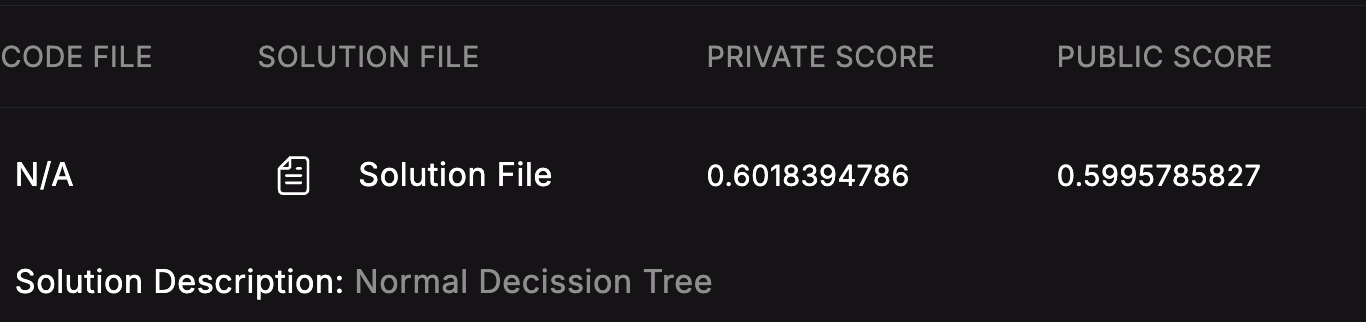

In [1352]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/DTree1_submission.csv',index=False)

Train Confusion-matrix:
 [[267692      8]
 [    40  37147]]

Test Confusion-matrix :
 [[64764  1935]
 [ 8371  1152]] 

Train Classification-report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    267700
           1       1.00      1.00      1.00     37187

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887


Test Classification-report :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     66699
           1       0.37      0.12      0.18      9523

    accuracy                           0.86     76222
   macro avg       0.63      0.55      0.55     76222
weighted avg       0.82      0.86      0.83     76222
 

Train Accuracy-Score: 0.9998425646223027
Test Accuracy-Score : 0.8647896932644118 

Train ROC AUC SCORE: 0.9994472355433596
Test ROC AUC SCORE : 0.5459796763874571 

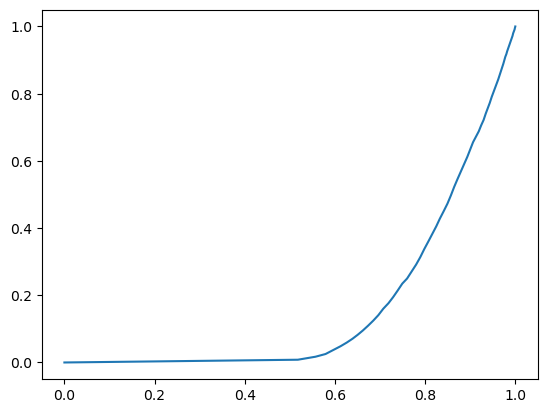


ROC-Curve for 1



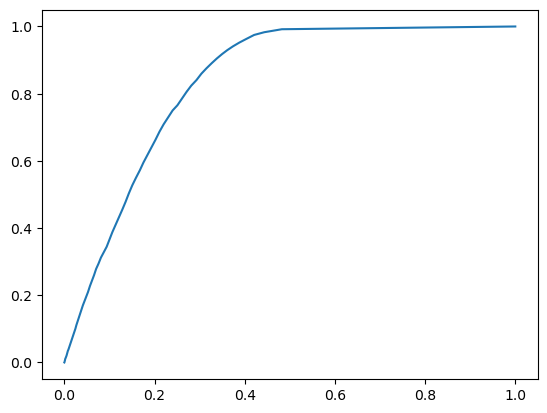

CPU times: user 28.9 s, sys: 747 ms, total: 29.6 s
Wall time: 30.7 s


In [1354]:
%%time
mymodel = RandomForestClassifier()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(train_X,val_X,train_y,val_y,model_pipeline)

## RandomForest submission score
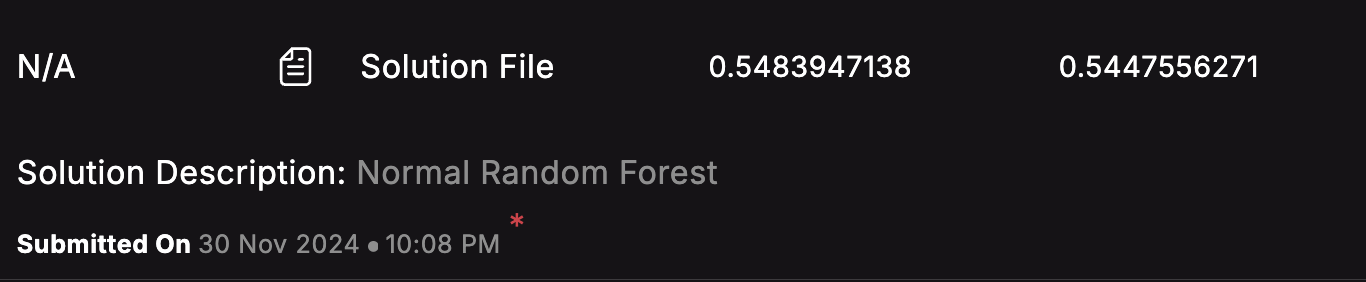

In [688]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/Ranfor_submission.csv',index=False)

In [1360]:
# Checking target distribution
y.value_counts(),y.value_counts(normalize=True)

(Response
 0    334399
 1     46710
 Name: count, dtype: int64,
 Response
 0    0.877437
 1    0.122563
 Name: proportion, dtype: float64)

<Axes: xlabel='Response'>

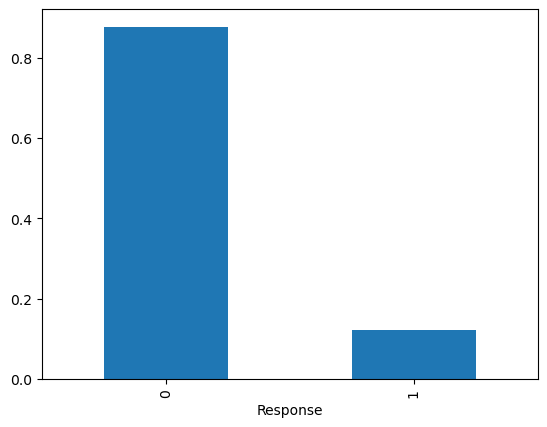

In [1378]:
y.value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='Response'>

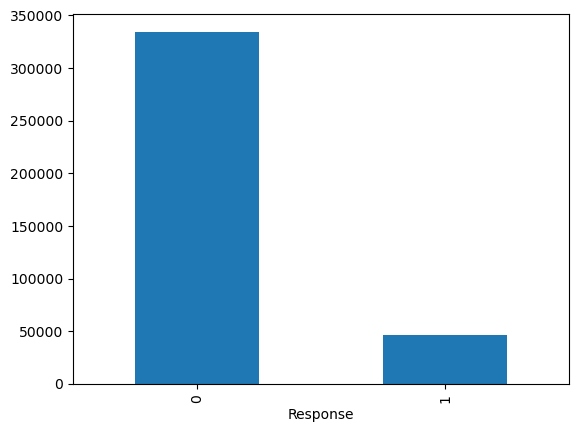

In [1384]:
y.value_counts().plot(kind='bar')

<Axes: ylabel='count'>

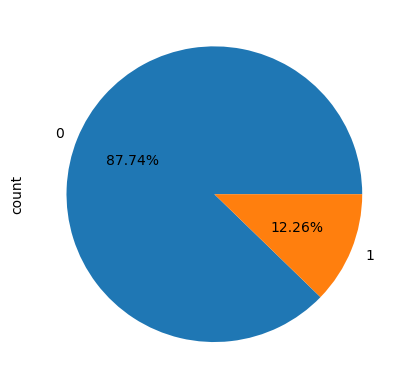

In [1392]:
y.value_counts().plot(kind='pie', autopct='%1.2f%%')

###  With the above plots we can see the Target is clearly **imbalanced**
#### Using below sampling techniques 
        1. under-sampling
        2. over-sampling

In [701]:
# importing imblearn 
from imblearn.under_sampling import RandomUnderSampler

In [722]:
under_smapling = RandomUnderSampler()

In [724]:
train_y.value_counts(),train_y.value_counts(normalize=True)

(Response
 0    267700
 1     37187
 Name: count, dtype: int64,
 Response
 0    0.87803
 1    0.12197
 Name: proportion, dtype: float64)

In [1422]:
# Resampling the data using under_smapling strategy
us_train_X,us_train_y=under_smapling.fit_resample(train_X,train_y)
train_X,train_y=under_smapling.fit_resample(train_X,train_y)

In [1424]:
us_train_X.shape,us_train_y.shape

((74374, 10), (74374,))

In [1426]:
train_X.shape,train_y.shape

((74374, 10), (74374,))

In [1428]:
us_train_y.value_counts()

Response
0    37187
1    37187
Name: count, dtype: int64

In [1430]:
train['Response'].value_counts(),train['Response'].value_counts(normalize=True)

(Response
 0    334399
 1     46710
 Name: count, dtype: int64,
 Response
 0    0.877437
 1    0.122563
 Name: proportion, dtype: float64)

Train Confusion-matrix:
 [[22160 15027]
 [  991 36196]]

Test Confusion-matrix :
 [[39657 27042]
 [  259  9264]] 

Train Classification-report:
               precision    recall  f1-score   support

           0       0.96      0.60      0.73     37187
           1       0.71      0.97      0.82     37187

    accuracy                           0.78     74374
   macro avg       0.83      0.78      0.78     74374
weighted avg       0.83      0.78      0.78     74374


Test Classification-report :
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.26      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222
 

Train Accuracy-Score: 0.7846290370290693
Test Accuracy-Score : 0.6418225709112855 

Train ROC AUC SCORE: 0.7846290370290694
Test ROC AUC SCORE : 0.7836846617052181 

Tr

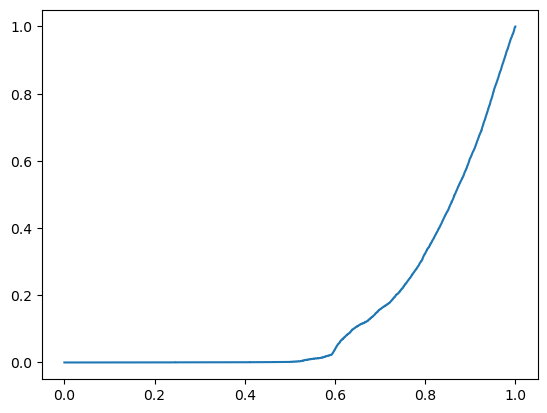


ROC-Curve for 1



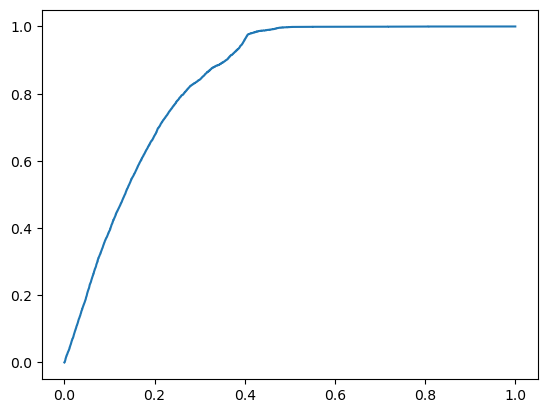

CPU times: user 449 ms, sys: 51.1 ms, total: 500 ms
Wall time: 511 ms


In [1432]:
%%time
mymodel = LogisticRegression()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [1434]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/US_LogiReg_submission.csv',index=False)

## UnderSampled LogisticRegression submission score
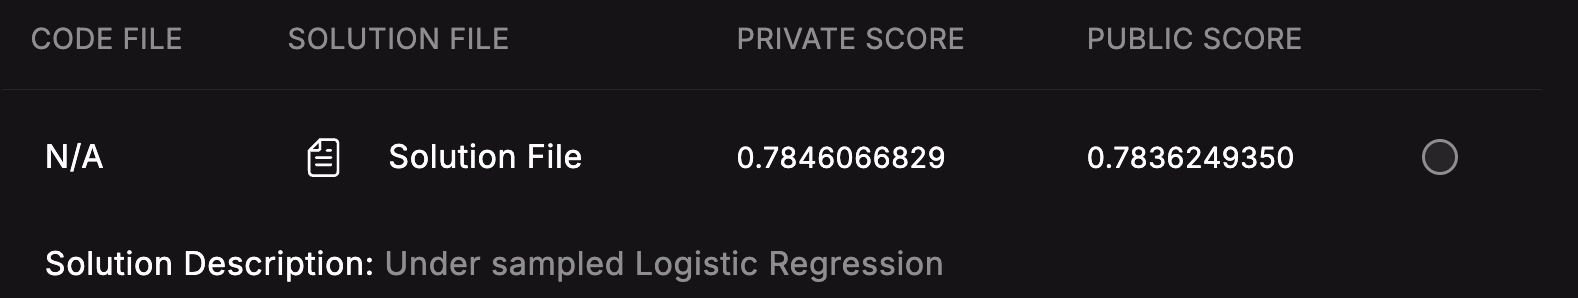

Train Confusion-matrix:
 [[37187     0]
 [    7 37180]]

Test Confusion-matrix :
 [[48376 18323]
 [ 2776  6747]] 

Train Classification-report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     37187
           1       1.00      1.00      1.00     37187

    accuracy                           1.00     74374
   macro avg       1.00      1.00      1.00     74374
weighted avg       1.00      1.00      1.00     74374


Test Classification-report :
               precision    recall  f1-score   support

           0       0.95      0.73      0.82     66699
           1       0.27      0.71      0.39      9523

    accuracy                           0.72     76222
   macro avg       0.61      0.72      0.61     76222
weighted avg       0.86      0.72      0.77     76222
 

Train Accuracy-Score: 0.9999058810874768
Test Accuracy-Score : 0.7231901550733384 

Train ROC AUC SCORE: 0.9999058810874768
Test ROC AUC SCORE : 0.7168917286499016 

Tr

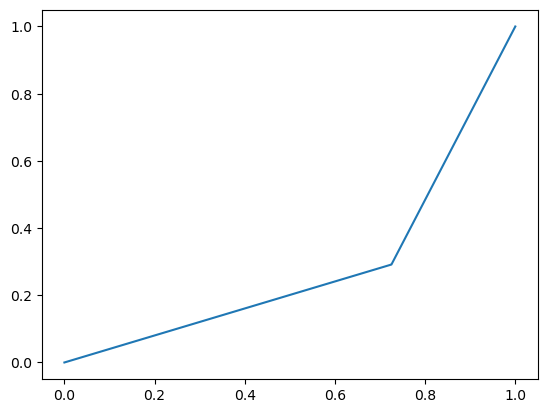


ROC-Curve for 1



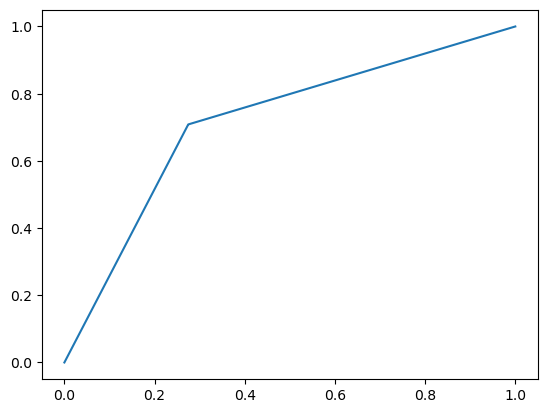

CPU times: user 723 ms, sys: 19.5 ms, total: 743 ms
Wall time: 763 ms


In [1489]:
%%time
mymodel = DecisionTreeClassifier()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
# print(model_pipeline)
model_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [1491]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/US_DT_submission.csv',index=False)

## UnderSampled Decision Tree submission score
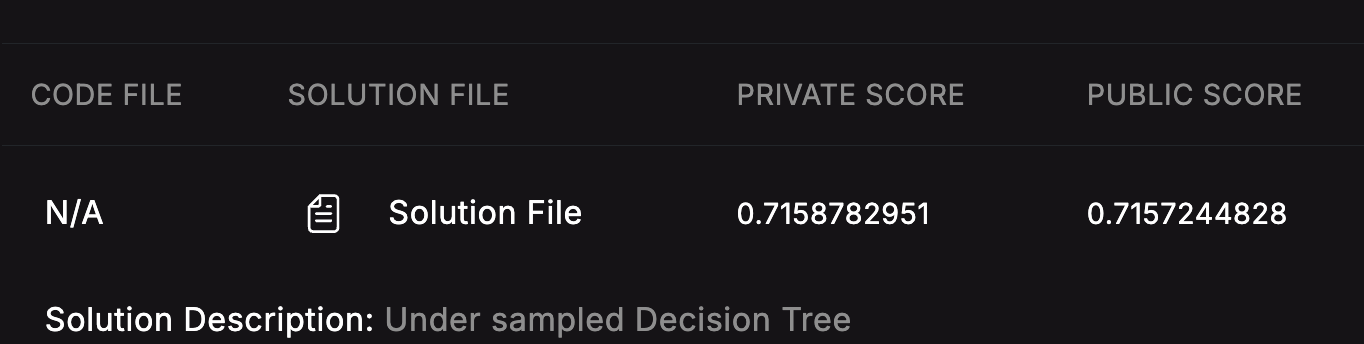

Train confusion-matrix:
 [[267694      6]
 [    39  37148]]
Test confusion-matrix :
 [[64782  1917]
 [ 8374  1149]]
Train classification-report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    267700
           1       1.00      1.00      1.00     37187

    accuracy                           1.00    304887
   macro avg       1.00      1.00      1.00    304887
weighted avg       1.00      1.00      1.00    304887

Test classification-report :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     66699
           1       0.37      0.12      0.18      9523

    accuracy                           0.86     76222
   macro avg       0.63      0.55      0.55     76222
weighted avg       0.82      0.86      0.83     76222

Train Accuracy-Score: 0.9998524043334087
Test Accuracy-Score : 0.8649864868410695 

Train ROC AUC SCORE : 0.9994644166271327
Test ROC AUC SCORE  : 0.5459570975555591 

Tr

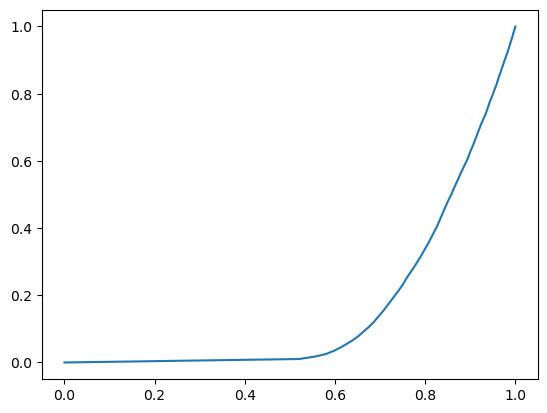


ROC-Curve for 1



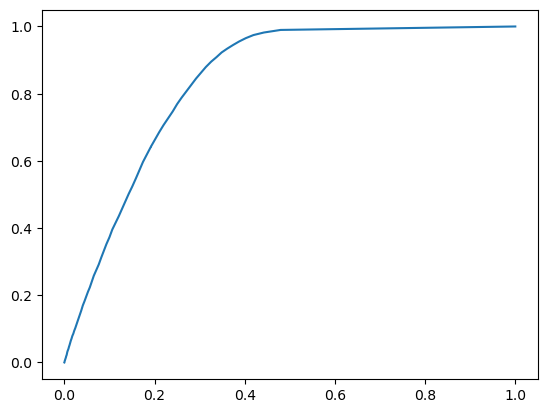

CPU times: user 28.7 s, sys: 705 ms, total: 29.4 s
Wall time: 30.2 s


In [881]:
%%time
mymodel = RandomForestClassifier()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [887]:
submission['Response']=model_pipeline.predict(test)

In [889]:
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/US_Ranfor_submission.csv',index=False)

## UnderSampled Random Forest submission score
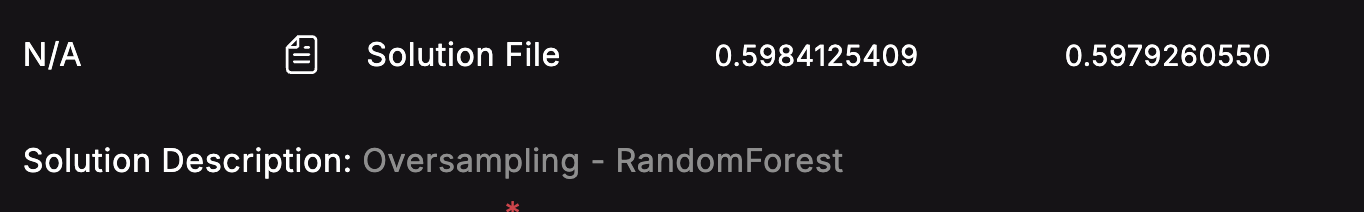

In [827]:
train_X.shape,train_y.shape,val_X.shape,val_y.shape

((304887, 10), (304887,), (76222, 10), (76222,))

Train Confusion-matrix:
 [[28156  9031]
 [ 3625 33562]]

Test Confusion-matrix :
 [[45940 20759]
 [ 1519  8004]] 

Train Classification-report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82     37187
           1       0.79      0.90      0.84     37187

    accuracy                           0.83     74374
   macro avg       0.84      0.83      0.83     74374
weighted avg       0.84      0.83      0.83     74374


Test Classification-report :
               precision    recall  f1-score   support

           0       0.97      0.69      0.80     66699
           1       0.28      0.84      0.42      9523

    accuracy                           0.71     76222
   macro avg       0.62      0.76      0.61     76222
weighted avg       0.88      0.71      0.76     76222
 

Train Accuracy-Score: 0.829833006158066
Test Accuracy-Score : 0.7077221799480465 

Train ROC AUC SCORE: 0.8298330061580659
Test ROC AUC SCORE : 0.7646286951437604 

Tra

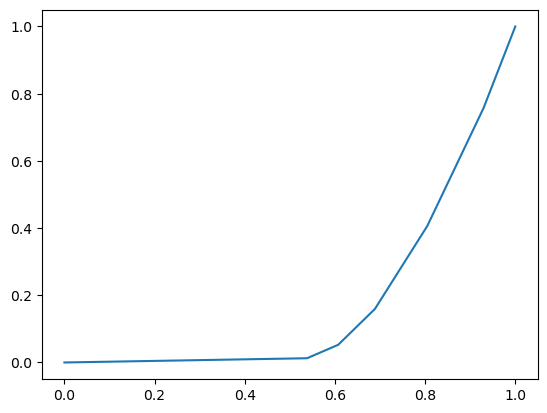


ROC-Curve for 1



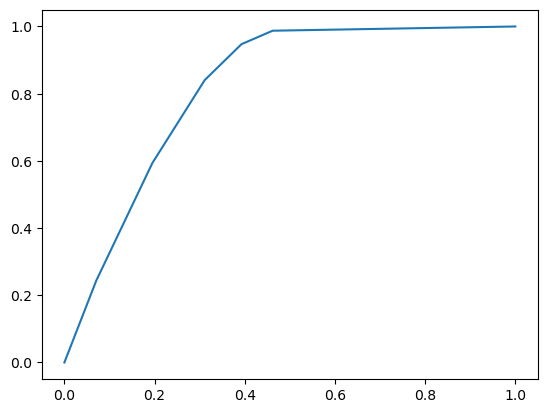

CPU times: user 21.2 s, sys: 230 ms, total: 21.4 s
Wall time: 21.8 s


In [1495]:
%%time
mymodel = KNeighborsClassifier()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [1497]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/US_KNN_submission.csv',index=False)

## UnderSampled KNN Classifier submission score
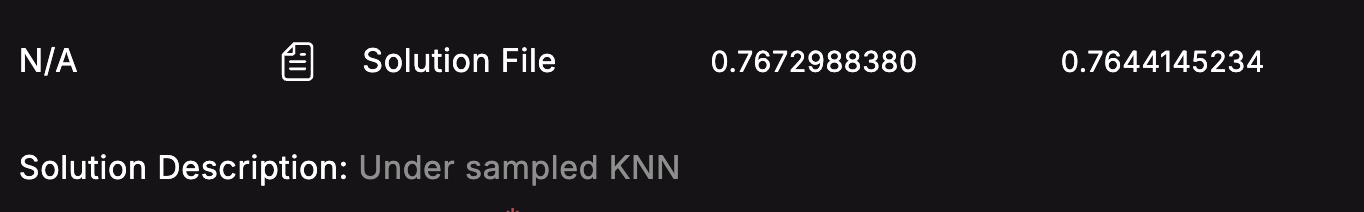

# Few observation had difference in Train & Test ROC AUC SCORE 
This is a clear case of over-fitting. Hence drilling with ***Regularization*** Technique

In [859]:
# model_pipeline

In [1504]:
%%time
mymodel = LogisticRegression()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])

CPU times: user 36 μs, sys: 236 μs, total: 272 μs
Wall time: 275 μs


In [1506]:
grid=GridSearchCV(estimator=model_pipeline,param_grid=params,verbose=3,scoring='roc_auc')

In [867]:
grid.fit(train_X,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END mlmodel__C=0.1, mlmodel__l1_ratio=0.5, mlmodel__penalty=l1, mlmodel__solver=saga;, score=0.835 total time=   5.2s
[CV 2/5] END mlmodel__C=0.1, mlmodel__l1_ratio=0.5, mlmodel__penalty=l1, mlmodel__solver=saga;, score=0.834 total time=   5.0s
[CV 3/5] END mlmodel__C=0.1, mlmodel__l1_ratio=0.5, mlmodel__penalty=l1, mlmodel__solver=saga;, score=0.839 total time=   4.8s
[CV 4/5] END mlmodel__C=0.1, mlmodel__l1_ratio=0.5, mlmodel__penalty=l1, mlmodel__solver=saga;, score=0.836 total time=   4.7s
[CV 5/5] END mlmodel__C=0.1, mlmodel__l1_ratio=0.5, mlmodel__penalty=l1, mlmodel__solver=saga;, score=0.835 total time=   4.7s
[CV 1/5] END mlmodel__C=0.1, mlmodel__l1_ratio=0.5, mlmodel__penalty=l2, mlmodel__solver=saga;, score=0.835 total time=   5.2s
[CV 2/5] END mlmodel__C=0.1, mlmodel__l1_ratio=0.5, mlmodel__penalty=l2, mlmodel__solver=saga;, score=0.834 total time=   5.2s
[CV 3/5] END mlmodel__C=0.1, mlmodel__l1_ratio=0.5,

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                                       ('mlmodel', LogisticRegression())]),
             param_grid=[{'mlmodel__C': [0.1, 1, 10],
                          'mlmodel__l1_ratio': [0.5],
                          'mlmodel__penalty': ['l1', 'l2', 'elasticnet'],
                          'mlmodel__solver': ['saga']}],
             scoring='roc_auc', verbose=3)

In [871]:
grid.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object'))])),
                ('mlmodel',
                 LogisticRegression(C=0.1, l1_ratio=0.5, penalty='l1',
                                    solver='saga'))])

In [875]:
grid.best_params_

{'mlmodel__C': 0.1,
 'mlmodel__l1_ratio': 0.5,
 'mlmodel__penalty': 'l1',
 'mlmodel__solver': 'saga'}

Train Confusion-matrix:
 [[22152 15035]
 [  972 36215]]

Test Confusion-matrix :
 [[39645 27054]
 [  252  9271]] 

Train Classification-report:
               precision    recall  f1-score   support

           0       0.96      0.60      0.73     37187
           1       0.71      0.97      0.82     37187

    accuracy                           0.78     74374
   macro avg       0.83      0.78      0.78     74374
weighted avg       0.83      0.78      0.78     74374


Test Classification-report :
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.26      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222
 

Train Accuracy-Score: 0.7847769381773201
Test Accuracy-Score : 0.6417569730523995 

Train ROC AUC SCORE: 0.78477693817732
Test ROC AUC SCORE : 0.7839622365742134 

Trai

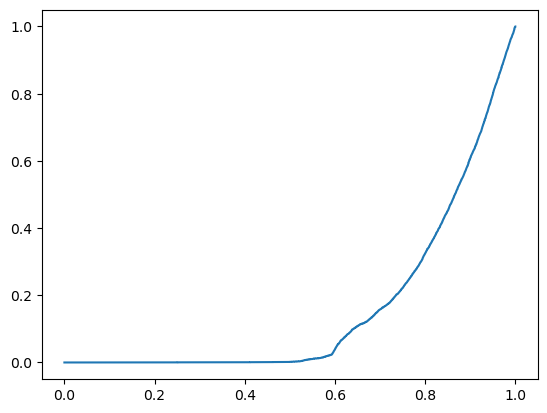


ROC-Curve for 1



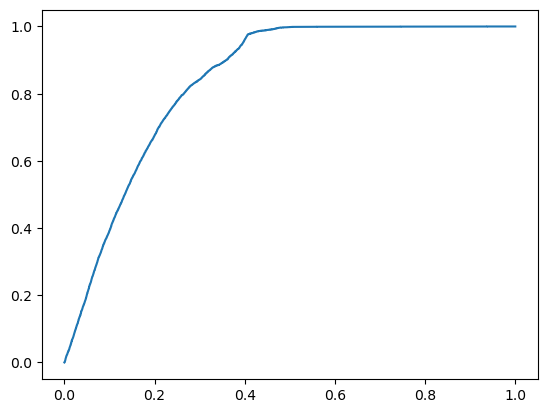

CPU times: user 565 ms, sys: 99.7 ms, total: 665 ms
Wall time: 800 ms


In [1525]:
# Applying the Best Fit Params
%%time
mymodel = LogisticRegression(
    C=0.1,l1_ratio=0.5,penalty= 'l1',solver= 'saga'
)
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [1527]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/US_Regul_LogiReg_submission.csv',index=False)

## UnderSampled Logistic Regression with L1 penalty submission score
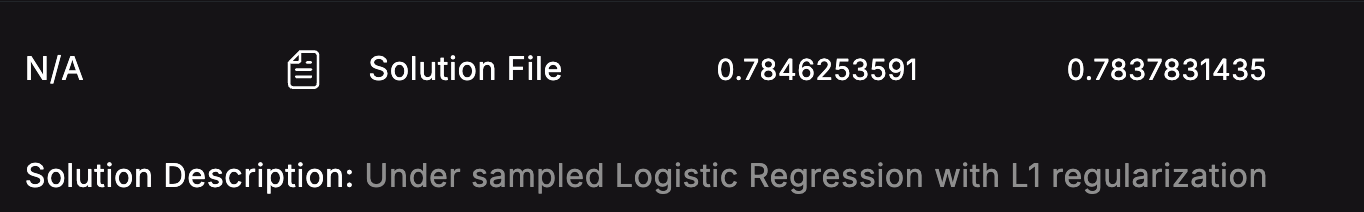


In [1516]:
# !pip install lightgbm

### Trying advanced Ensemble Techniques like Voting and Stacking and apply Bossting algorithm like AdaBoost,GradientBoost,XGBoost

In [893]:
clf1 = RandomForestClassifier()
clf2 = AdaBoostClassifier()
clf3 = GradientBoostingClassifier() 
clf4 = xgb.XGBClassifier(eval_metric='auc')

model = VotingClassifier(estimators=[('rf', clf1), ('ada', clf2),('gbm', clf3), ('xgb', clf4)], voting='soft')

In [897]:
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', model) 
])

Train confusion-matrix:
 [[267698      2]
 [ 28113   9074]]
Test confusion-matrix :
 [[66517   182]
 [ 9341   182]]
Train classification-report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95    267700
           1       1.00      0.24      0.39     37187

    accuracy                           0.91    304887
   macro avg       0.95      0.62      0.67    304887
weighted avg       0.92      0.91      0.88    304887

Test classification-report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.50      0.02      0.04      9523

    accuracy                           0.88     76222
   macro avg       0.69      0.51      0.49     76222
weighted avg       0.83      0.88      0.82     76222

Train Accuracy-Score: 0.9077855074175022
Test Accuracy-Score : 0.8750623179659416 

Train ROC AUC SCORE : 0.6220012662230814
Test ROC AUC SCORE  : 0.5081914739481143 

Tr

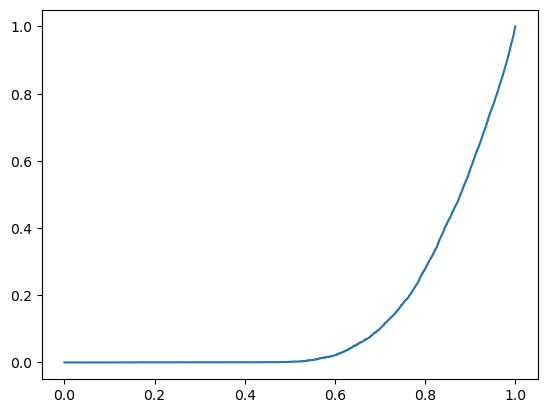


ROC-Curve for 1



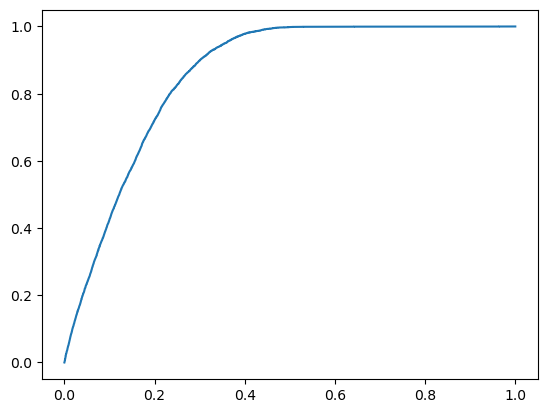

CPU times: user 1min 1s, sys: 1.22 s, total: 1min 2s
Wall time: 1min 1s


In [901]:
%%time
model_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [919]:
#Stacking
estimators = [
    ('dt',DecisionTreeClassifier()),
    ('rf1',RandomForestClassifier()),
    ('gbm',GradientBoostingClassifier()),
    ('ada', AdaBoostClassifier(n_estimators=200))
]

model = StackingClassifier(estimators=estimators,final_estimator=xgb.XGBClassifier())

In [921]:
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', model) 
])

Train confusion-matrix:
 [[266218   1482]
 [ 35059   2128]]
Test confusion-matrix :
 [[66498   201]
 [ 9378   145]]
Train classification-report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.94    267700
           1       0.59      0.06      0.10     37187

    accuracy                           0.88    304887
   macro avg       0.74      0.53      0.52    304887
weighted avg       0.85      0.88      0.83    304887

Test classification-report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.42      0.02      0.03      9523

    accuracy                           0.87     76222
   macro avg       0.65      0.51      0.48     76222
weighted avg       0.82      0.87      0.82     76222

Train Accuracy-Score: 0.8801490388242201
Test Accuracy-Score : 0.8743276219464197 

Train ROC AUC SCORE : 0.5258441254996918
Test ROC AUC SCORE  : 0.5061063779005751 

Tr

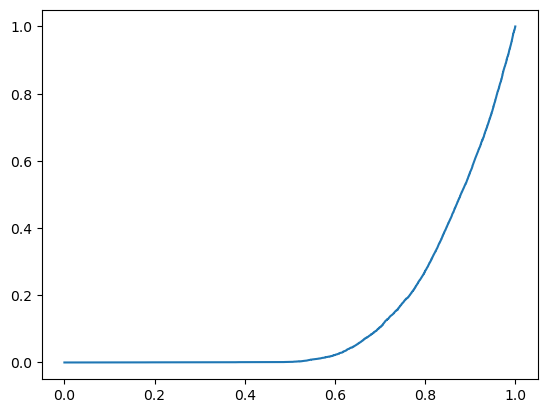


ROC-Curve for 1



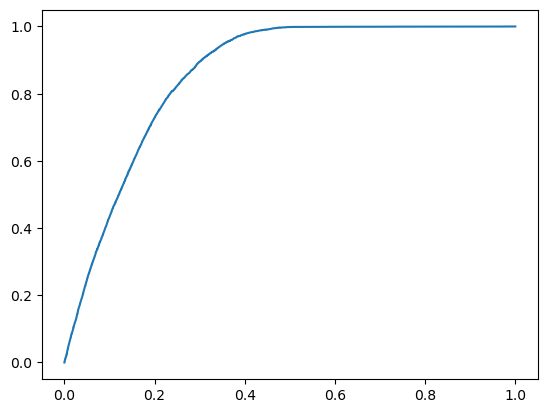

CPU times: user 5min 49s, sys: 5.67 s, total: 5min 55s
Wall time: 5min 57s


In [923]:
%%time
model_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [945]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'P...
                                                                  grow_policy=None,
                                                                  importance_type=None,
                                                                  interaction_constraints=None,
                                                                  learning_rate=None,
                                                                  max_bin=None,
                                                                  max_cat_threshold=None,
                                                                  max_cat_to_onehot=None,
                                                                  max_delta_step=None,
                                                                  max_depth=None,
                                                                  max_leaves=None,
                                                                  min_child_weight=None,
                                                                  missing=nan,
                                                                  monotone_constraints=None,
                                                                  multi_strategy=None,
                                                                  n_estimators=None,
                                                                  n_jobs=None,
                                                                  num_parallel_tree=None,
                                                                  random_state=None, ...)))])

In [947]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/xgb_submission.csv',index=False)

In [913]:
import joblib 

In [ ]:
# joblib.dump('cross-sell-pr')

In [927]:
joblib.dump(model_pipeline,'cross-sell-pred-pkl.gz')

['cross-sell-pred-pkl.gz']

In [931]:
# joblib.dump(model_pipeline,'cross-sell-pred-pkl2.pkl')

In [953]:
### OVersampling

from imblearn.over_sampling import RandomOverSampler,SMOTE

In [1027]:
over_sampling = RandomOverSampler()
SM_over_sampling = SMOTE()

In [1142]:
os_X,os_y = over_sampling.fit_resample(X,y)

In [1146]:
os_X.shape,os_y.shape

((668798, 10), (668798,))

In [1530]:
# model_pipeline

In [1532]:
# %%time
# model_eval(os_X,val_X,os_y,val_y,model_pipeline)

Train confusion-matrix:
 [[198318 136081]
 [  8968 325431]]
Test confusion-matrix :
 [[39660 27039]
 [  257  9266]]
Train classification-report:
               precision    recall  f1-score   support

           0       0.96      0.59      0.73    334399
           1       0.71      0.97      0.82    334399

    accuracy                           0.78    668798
   macro avg       0.83      0.78      0.77    668798
weighted avg       0.83      0.78      0.77    668798

Test classification-report :
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.26      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

Train Accuracy-Score: 0.7831198657890723
Test Accuracy-Score : 0.6418881687701713 

Train ROC AUC SCORE : 0.7831198657890723
Test ROC AUC SCORE  : 0.7838121597237668 

Tr

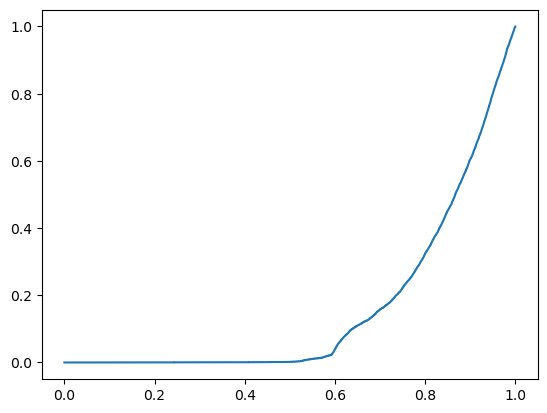


ROC-Curve for 1



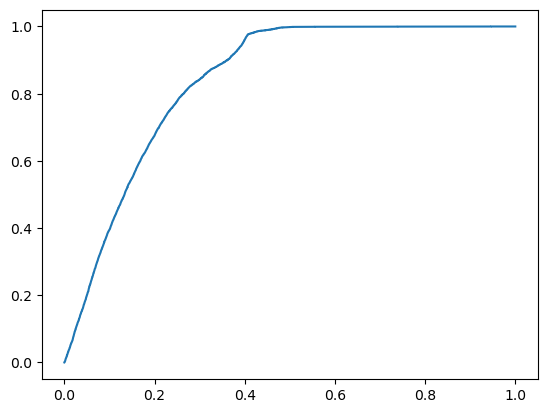

CPU times: user 2.06 s, sys: 221 ms, total: 2.28 s
Wall time: 2.16 s


In [975]:

%%time
mymodel = LogisticRegression()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(os_X,val_X,os_y,val_y,model_pipeline)

In [977]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/OS_LG_submission.csv',index=False)

### Oversampled Logistic Regression Submission Score
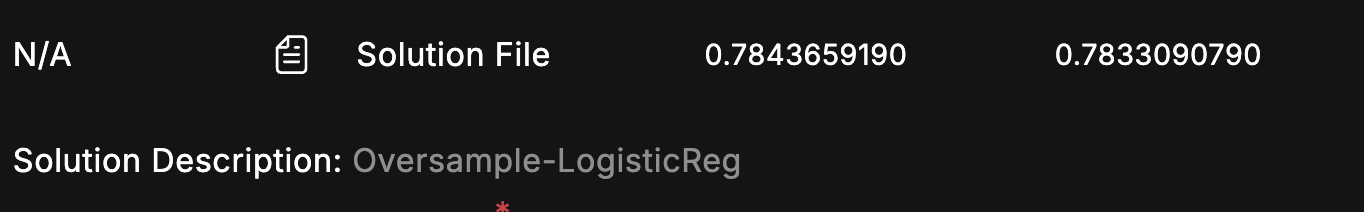

Train confusion-matrix:
 [[334345     54]
 [     0 334399]]
Test confusion-matrix :
 [[66688    11]
 [    0  9523]]
Train classification-report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    334399
           1       1.00      1.00      1.00    334399

    accuracy                           1.00    668798
   macro avg       1.00      1.00      1.00    668798
weighted avg       1.00      1.00      1.00    668798

Test classification-report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     66699
           1       1.00      1.00      1.00      9523

    accuracy                           1.00     76222
   macro avg       1.00      1.00      1.00     76222
weighted avg       1.00      1.00      1.00     76222

Train Accuracy-Score: 0.9999192581317528
Test Accuracy-Score : 0.999855684710451 

Train ROC AUC SCORE : 0.9999192581317529
Test ROC AUC SCORE  : 0.9999175399931033 

Tra

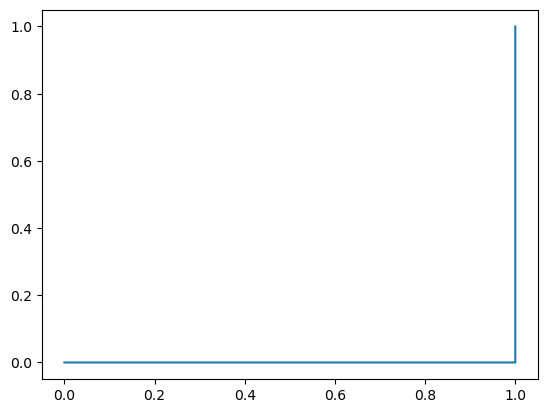


ROC-Curve for 1



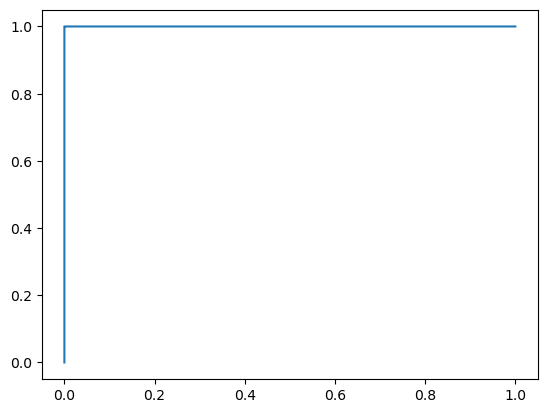

CPU times: user 4.18 s, sys: 207 ms, total: 4.39 s
Wall time: 4.44 s


In [979]:

%%time
mymodel = DecisionTreeClassifier()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(os_X,val_X,os_y,val_y,model_pipeline)

In [981]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/OS_DT_submission.csv',index=False)

### Oversampled Decision Tree Submission Score
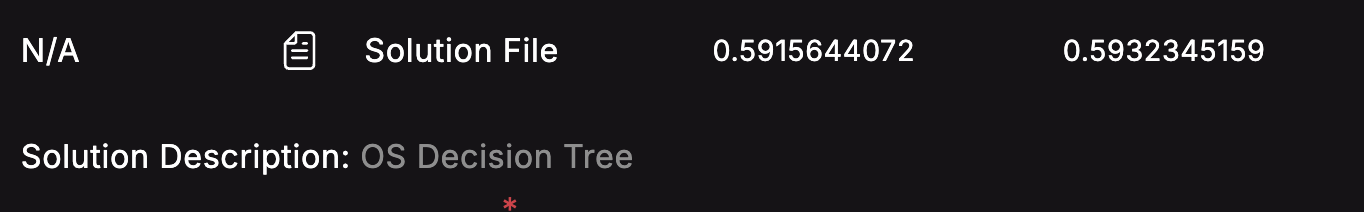

Train confusion-matrix:
 [[334345     54]
 [     0 334399]]
Test confusion-matrix :
 [[66688    11]
 [    0  9523]]
Train classification-report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    334399
           1       1.00      1.00      1.00    334399

    accuracy                           1.00    668798
   macro avg       1.00      1.00      1.00    668798
weighted avg       1.00      1.00      1.00    668798

Test classification-report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     66699
           1       1.00      1.00      1.00      9523

    accuracy                           1.00     76222
   macro avg       1.00      1.00      1.00     76222
weighted avg       1.00      1.00      1.00     76222

Train Accuracy-Score: 0.9999192581317528
Test Accuracy-Score : 0.999855684710451 

Train ROC AUC SCORE : 0.9999192581317529
Test ROC AUC SCORE  : 0.9999175399931033 

Tra

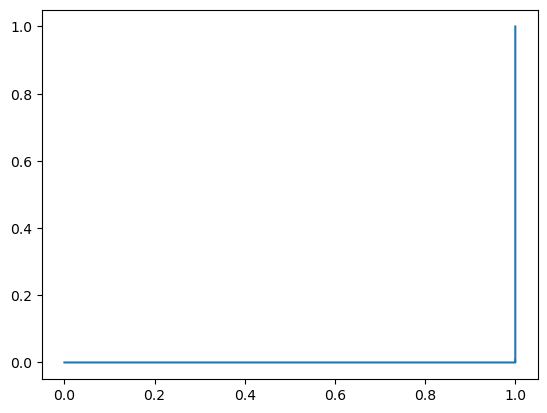


ROC-Curve for 1



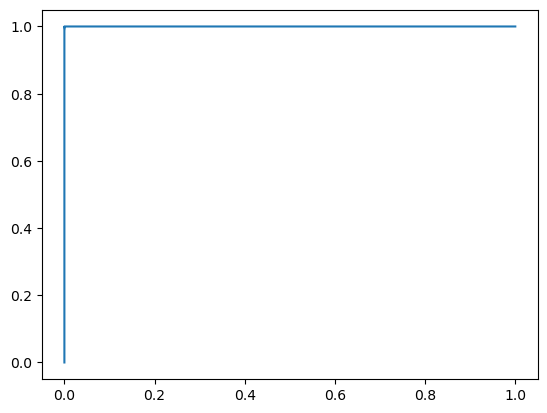

CPU times: user 1min 10s, sys: 1.14 s, total: 1min 11s
Wall time: 1min 12s


In [983]:

%%time
mymodel = RandomForestClassifier()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(os_X,val_X,os_y,val_y,model_pipeline)

In [985]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/OS_RF_submission.csv',index=False)

### Oversampled Random Forest Submission Score
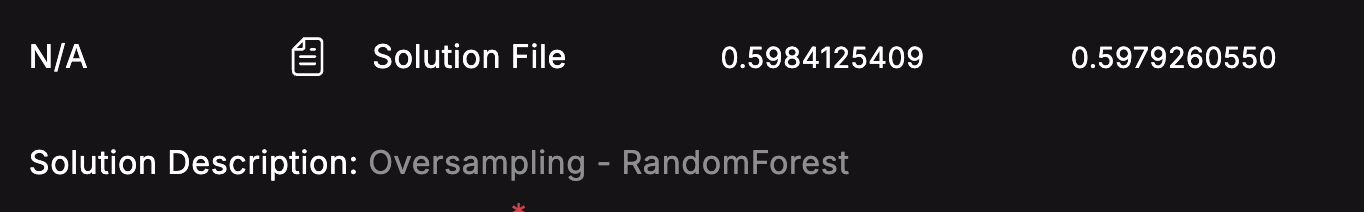

Train confusion-matrix:
 [[218237 116162]
 [ 20219 314180]]
Test confusion-matrix :
 [[43690 23009]
 [  585  8938]]
Train classification-report:
               precision    recall  f1-score   support

           0       0.92      0.65      0.76    334399
           1       0.73      0.94      0.82    334399

    accuracy                           0.80    668798
   macro avg       0.82      0.80      0.79    668798
weighted avg       0.82      0.80      0.79    668798

Test classification-report :
               precision    recall  f1-score   support

           0       0.99      0.66      0.79     66699
           1       0.28      0.94      0.43      9523

    accuracy                           0.69     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.69      0.74     76222

Train Accuracy-Score: 0.7960804308625324
Test Accuracy-Score : 0.6904568234892813 

Train ROC AUC SCORE : 0.7960804308625326
Test ROC AUC SCORE  : 0.7968010438805708 

Tr

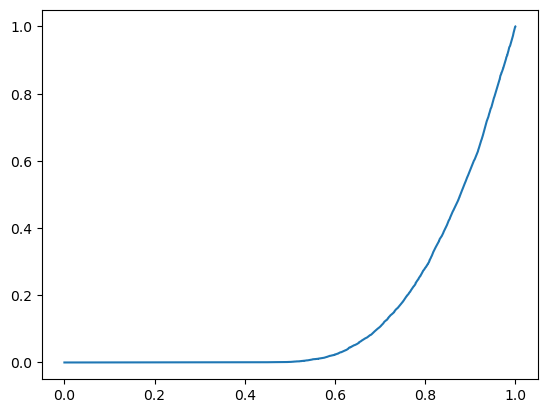


ROC-Curve for 1



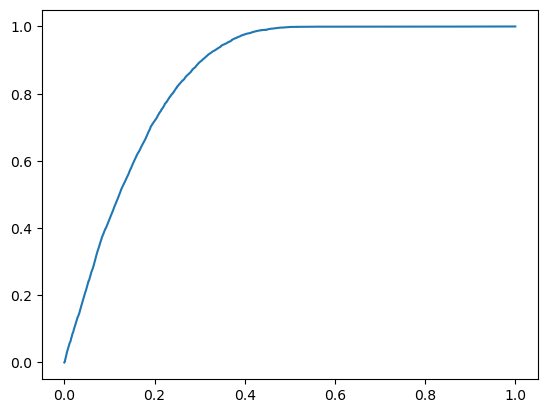

CPU times: user 15.1 s, sys: 1 s, total: 16.1 s
Wall time: 16.4 s


In [987]:

%%time
mymodel = AdaBoostClassifier()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(os_X,val_X,os_y,val_y,model_pipeline)

In [989]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/US_ada_submission.csv',index=False)

### Oversampled AdaBoost Submission Score
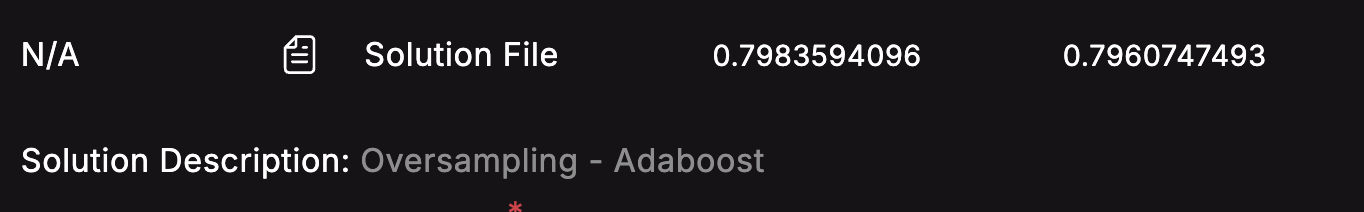

Train confusion-matrix:
 [[223329 111070]
 [ 24146 310253]]
Test confusion-matrix :
 [[44786 21913]
 [  672  8851]]
Train classification-report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77    334399
           1       0.74      0.93      0.82    334399

    accuracy                           0.80    668798
   macro avg       0.82      0.80      0.79    668798
weighted avg       0.82      0.80      0.79    668798

Test classification-report :
               precision    recall  f1-score   support

           0       0.99      0.67      0.80     66699
           1       0.29      0.93      0.44      9523

    accuracy                           0.70     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.90      0.70      0.75     76222

Train Accuracy-Score: 0.797822361908977
Test Accuracy-Score : 0.7036944714124531 

Train ROC AUC SCORE : 0.7978223619089769
Test ROC AUC SCORE  : 0.8004491708426801 

Tra

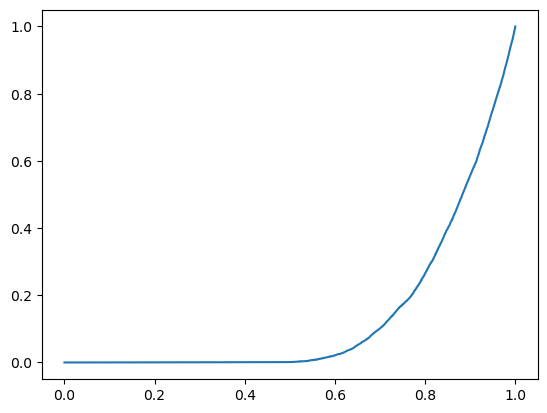


ROC-Curve for 1



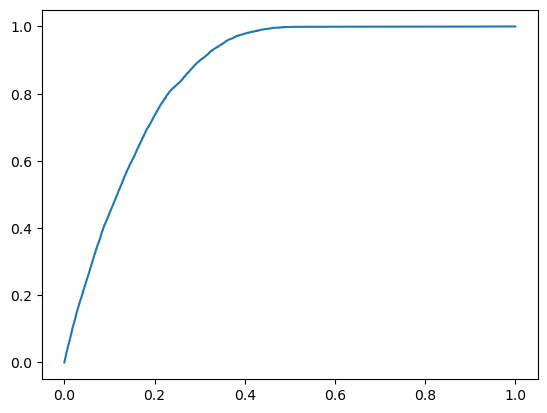

CPU times: user 1min 3s, sys: 953 ms, total: 1min 4s
Wall time: 1min 5s


In [991]:

%%time
mymodel = GradientBoostingClassifier()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(os_X,val_X,os_y,val_y,model_pipeline)

In [1001]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/OS_GB_submission.csv',index=False)

### Oversampled Gradient Boost Submission Score
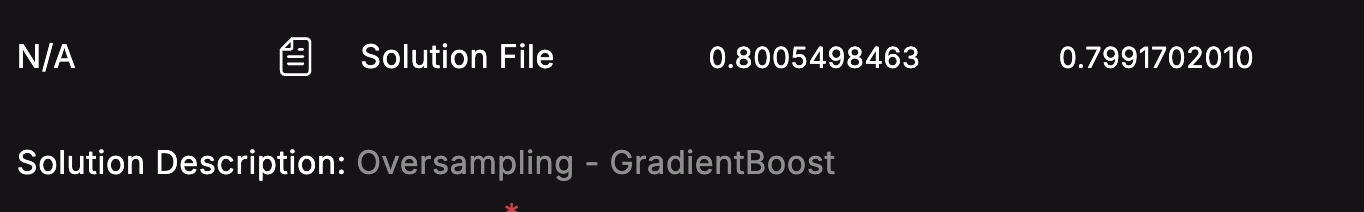

Train confusion-matrix:
 [[231399 103000]
 [ 18945 315454]]
Test confusion-matrix :
 [[46373 20326]
 [  545  8978]]
Train classification-report:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79    334399
           1       0.75      0.94      0.84    334399

    accuracy                           0.82    668798
   macro avg       0.84      0.82      0.81    668798
weighted avg       0.84      0.82      0.81    668798

Test classification-report :
               precision    recall  f1-score   support

           0       0.99      0.70      0.82     66699
           1       0.31      0.94      0.46      9523

    accuracy                           0.73     76222
   macro avg       0.65      0.82      0.64     76222
weighted avg       0.90      0.73      0.77     76222

Train Accuracy-Score: 0.8176654236406209
Test Accuracy-Score : 0.7261814174385348 

Train ROC AUC SCORE : 0.8176654236406209
Test ROC AUC SCORE  : 0.8190139677142652 

Tr

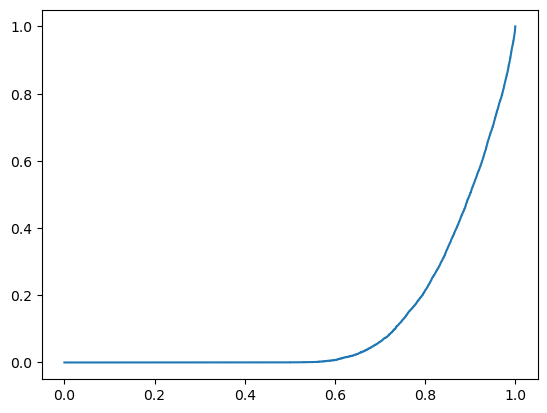


ROC-Curve for 1



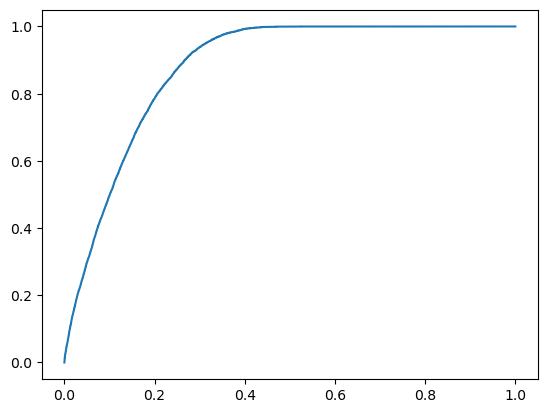

CPU times: user 5.64 s, sys: 517 ms, total: 6.15 s
Wall time: 2.74 s


In [1134]:

%%time
mymodel = xgb.XGBClassifier()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(os_X,val_X,os_y,val_y,model_pipeline)

### Oversampled XG Boost Submission Score
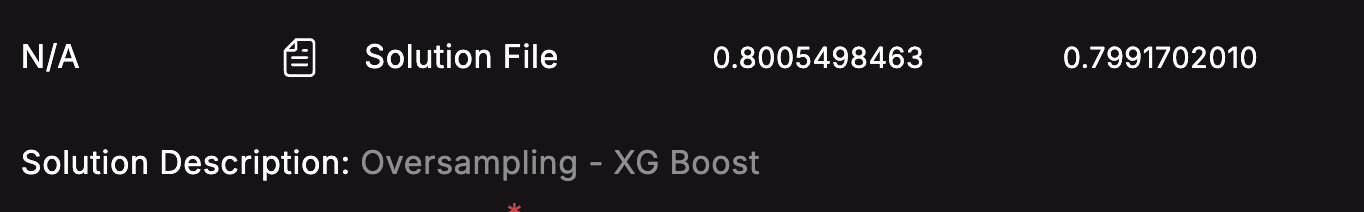

In [1140]:
joblib.dump(model_pipeline,'cross-sell-pred-xgb-pkl.gz')

['cross-sell-pred-xgb-pkl.gz']

In [1138]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/OS_XGB_submission2.csv',index=False)

In [1005]:
clf1 = LogisticRegression()
clf2 = AdaBoostClassifier()
clf3 = GradientBoostingClassifier() 
clf4 = xgb.XGBClassifier(eval_metric='auc')

model = VotingClassifier(estimators=[('lg', clf1), ('ada', clf2),('gbm', clf3), ('xgb', clf4)], voting='soft')

In [1018]:
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', model) 
])

In [1019]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'P...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                  voting='soft'))])

Train confusion-matrix:
 [[220837 113562]
 [ 15671 318728]]
Test confusion-matrix :
 [[44243 22456]
 [  446  9077]]
Train classification-report:
               precision    recall  f1-score   support

           0       0.93      0.66      0.77    334399
           1       0.74      0.95      0.83    334399

    accuracy                           0.81    668798
   macro avg       0.84      0.81      0.80    668798
weighted avg       0.84      0.81      0.80    668798

Test classification-report :
               precision    recall  f1-score   support

           0       0.99      0.66      0.79     66699
           1       0.29      0.95      0.44      9523

    accuracy                           0.70     76222
   macro avg       0.64      0.81      0.62     76222
weighted avg       0.90      0.70      0.75     76222

Train Accuracy-Score: 0.8067682618668118
Test Accuracy-Score : 0.6995355671590879 

Train ROC AUC SCORE : 0.8067682618668118
Test ROC AUC SCORE  : 0.8082446536584225 

Tr

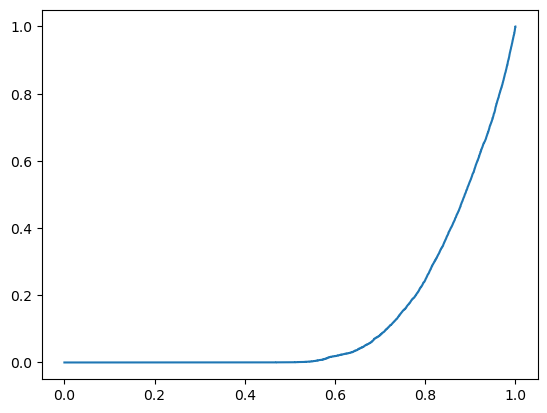


ROC-Curve for 1



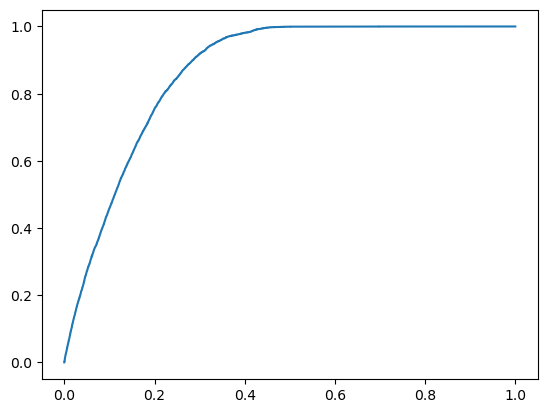

CPU times: user 1min 17s, sys: 1.78 s, total: 1min 19s
Wall time: 1min 16s


In [1017]:

%%time
model_eval(os_X,val_X,os_y,val_y,model_pipeline)

In [1023]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/OS_voting_submission.csv',index=False)

### Oversampled Voting Submission Score
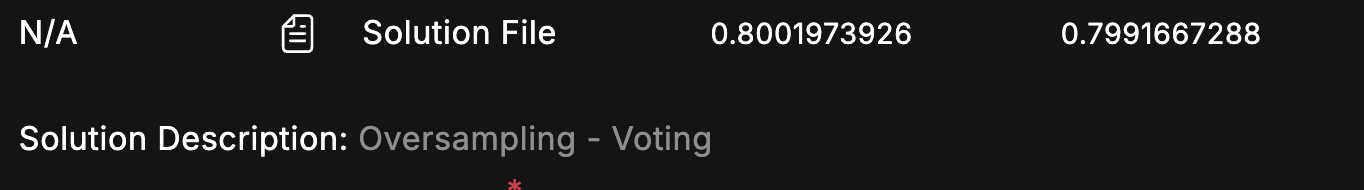

In [1127]:
#Stacking
estimators = [
    ('dt',DecisionTreeClassifier()),
    ('rf1',RandomForestClassifier()),
    ('lg',LogisticRegression()),
    ('ada', AdaBoostClassifier()),
    ('gbm',GradientBoostingClassifier()),
]

model = StackingClassifier(estimators=estimators,final_estimator=xgb.XGBClassifier())
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', model) 
])

Train confusion-matrix:
 [[334345     54]
 [    64 334335]]
Test confusion-matrix :
 [[66688    11]
 [    8  9515]]
Train classification-report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    334399
           1       1.00      1.00      1.00    334399

    accuracy                           1.00    668798
   macro avg       1.00      1.00      1.00    668798
weighted avg       1.00      1.00      1.00    668798

Test classification-report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     66699
           1       1.00      1.00      1.00      9523

    accuracy                           1.00     76222
   macro avg       1.00      1.00      1.00     76222
weighted avg       1.00      1.00      1.00     76222

Train Accuracy-Score: 0.9998235640656821
Test Accuracy-Score : 0.9997507281362337 

Train ROC AUC SCORE : 0.999823564065682
Test ROC AUC SCORE  : 0.9994975042900685 

Tra

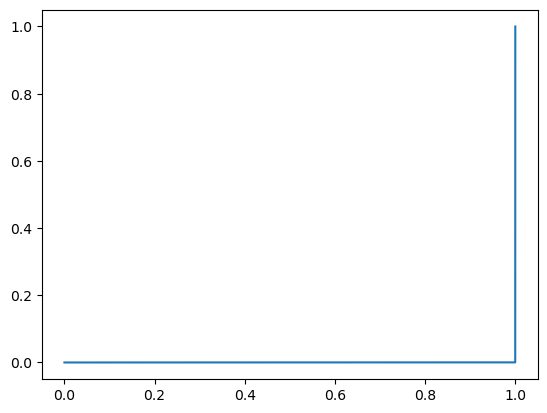


ROC-Curve for 1



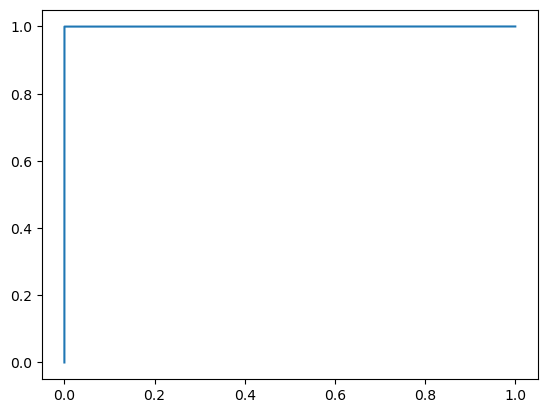

CPU times: user 10min 56s, sys: 10.5 s, total: 11min 7s
Wall time: 11min 10s


In [1129]:
%%time
model_eval(os_X,val_X,os_y,val_y,model_pipeline)

In [1131]:
submission['Response']=model_pipeline.predict(test)
submission.to_csv('/Users/bkannadasan/Downloads/Hackathon/OS_Stacking_submission.csv',index=False)

### Oversampled Stacking Submission Score
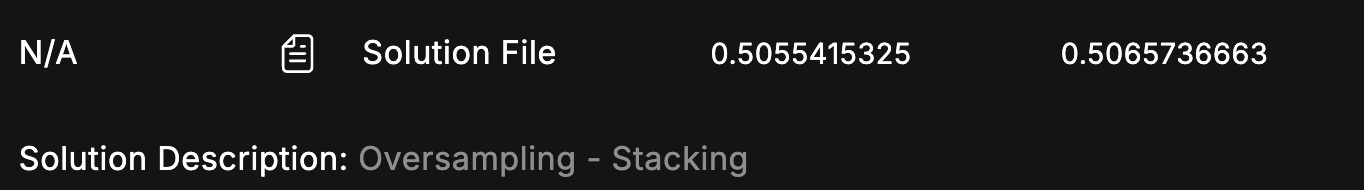

In [1546]:
# X.columns

In [1039]:
X.shape,y.shape

((381109, 10), (381109,))

In [1051]:
y.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

### Applying SMOTE based oversampling

In [1043]:
SM_OS_X,SM_OS_y = SM_over_sampling.fit_resample(X,y)

ValueError: could not convert string to float: 'Male'

In [1047]:
print(X.head(2))

  Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0   Male   44                1         28.0                   0   > 2 Years   
1   Male   76                1          3.0                   0    1-2 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0            Yes         40454.0                  26.0      217  
1             No         33536.0                  26.0      183  


In [1060]:
gender = {'Male':0,'Female':1}
v_age = {'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}
v_damage = {'No':0,'Yes':1} 

In [1082]:
New_X=X.copy()

In [1084]:
New_X

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0         Male   44                1         28.0                   0   
1         Male   76                1          3.0                   0   
2         Male   47                1         28.0                   0   
3         Male   21                1         11.0                   1   
4       Female   29                1         41.0                   1   
...        ...  ...              ...          ...                 ...   
381104    Male   74                1         26.0                   1   
381105    Male   30                1         37.0                   1   
381106    Male   21                1         30.0                   1   
381107  Female   68                1         14.0                   0   
381108    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0        > 2 Years            Yes         40454.0                  26.0   
1         1-2 Year             No         33536.0                  26.0   
2        > 2 Years            Yes         38294.0                  26.0   
3         < 1 Year             No         28619.0                 152.0   
4         < 1 Year             No         27496.0                 152.0   
...            ...            ...             ...                   ...   
381104    1-2 Year             No         30170.0                  26.0   
381105    < 1 Year             No         40016.0                 152.0   
381106    < 1 Year             No         35118.0                 160.0   
381107   > 2 Years            Yes         44617.0                 124.0   
381108    1-2 Year             No         41777.0                  26.0   

        Vintage  
0           217  
1           183  
2            27  
3           203  
4            39  
...         ...  
381104       88  
381105      131  
381106      161  
381107       74  
381108      237  

[381109 rows x 10 columns]

In [1086]:
New_X['Gender']=New_X['Gender'].map(gender)

In [1096]:
New_X.head(2)

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       0   44                1         28.0                   0            3   
1       0   76                1          3.0                   0            2   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0               1         40454.0                  26.0      217  
1               0         33536.0                  26.0      183

In [1094]:
New_X['Vehicle_Age']=New_X['Vehicle_Age'].map(v_age)
New_X['Vehicle_Damage']=New_X['Vehicle_Damage'].map(v_damage)

In [1098]:
New_X.head(2)

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       0   44                1         28.0                   0            3   
1       0   76                1          3.0                   0            2   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0               1         40454.0                  26.0      217  
1               0         33536.0                  26.0      183

In [1100]:
SM_OS_X,SM_OS_y = SM_over_sampling.fit_resample(New_X,y)

In [1104]:
SM_OS_X.shape,SM_OS_y.shape

((668798, 10), (668798,))

In [1111]:
clf1 = LogisticRegression()
clf2 = AdaBoostClassifier()
clf3 = GradientBoostingClassifier() 
clf4 = xgb.XGBClassifier(eval_metric='auc')

model = VotingClassifier(estimators=[('lg', clf1), ('ada', clf2),('gbm', clf3), ('xgb', clf4)], voting='soft')
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', model) 
])

In [1113]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')),
                                                 ('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'P...
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))],
                                  voting='soft'))])

Train confusion-matrix:
 [[256592  77807]
 [ 20190 314209]]
Test confusion-matrix :
 [[59151  7548]
 [ 5545  3978]]
Train classification-report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84    334399
           1       0.80      0.94      0.87    334399

    accuracy                           0.85    668798
   macro avg       0.86      0.85      0.85    668798
weighted avg       0.86      0.85      0.85    668798

Test classification-report :
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     66699
           1       0.35      0.42      0.38      9523

    accuracy                           0.83     76222
   macro avg       0.63      0.65      0.64     76222
weighted avg       0.84      0.83      0.84     76222

Train Accuracy-Score: 0.8534729469884779
Test Accuracy-Score : 0.8282254467214191 

Train ROC AUC SCORE : 0.8534729469884778
Test ROC AUC SCORE  : 0.6522801958744013 

Tr

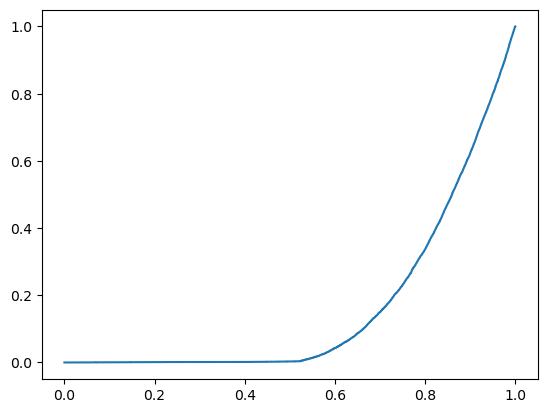


ROC-Curve for 1



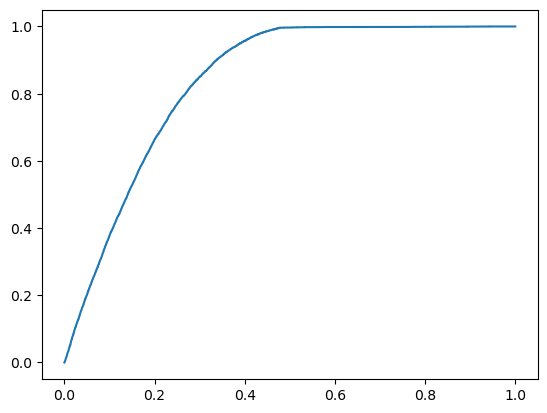

CPU times: user 1min 34s, sys: 2.18 s, total: 1min 37s
Wall time: 1min 35s


In [1117]:
%%time
model_eval(SM_OS_X,val_X,SM_OS_y,val_y,model_pipeline)

In [1463]:
Bala_X=New_X.copy()
Bala_X

Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            0   44                1         28.0                   0   
1            0   76                1          3.0                   0   
2            0   47                1         28.0                   0   
3            0   21                1         11.0                   1   
4            1   29                1         41.0                   1   
...        ...  ...              ...          ...                 ...   
381104       0   74                1         26.0                   1   
381105       0   30                1         37.0                   1   
381106       0   21                1         30.0                   1   
381107       1   68                1         14.0                   0   
381108       0   46                1         29.0                   0   

        Vehicle_Age  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  \
0                 3               1         40454.0                  26.0   
1                 2               0         33536.0                  26.0   
2                 3               1         38294.0                  26.0   
3                 1               0         28619.0                 152.0   
4                 1               0         27496.0                 152.0   
...             ...             ...             ...                   ...   
381104            2               0         30170.0                  26.0   
381105            1               0         40016.0                 152.0   
381106            1               0         35118.0                 160.0   
381107            3               1         44617.0                 124.0   
381108            2               0         41777.0                  26.0   

        Vintage  Response  
0           217         1  
1           183         0  
2            27         1  
3           203         0  
4            39         0  
...         ...       ...  
381104       88         0  
381105      131         0  
381106      161         0  
381107       74         0  
381108      237         0  

[381109 rows x 11 columns]

In [1465]:
Bala_y=Bala_X['Response']

In [1467]:
Bala_X.drop(columns='Response',inplace=True)

In [1475]:
Bala_X.head(3)

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       0   44                1         28.0                   0            3   
1       0   76                1          3.0                   0            2   
2       0   47                1         28.0                   0            3   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0               1         40454.0                  26.0      217  
1               0         33536.0                  26.0      183  
2               1         38294.0                  26.0       27

In [1477]:
Bala_y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

Train Confusion-matrix:
 [[334392      7]
 [    51  46659]]

Test Confusion-matrix :
 [[66699     0]
 [ 9523     0]] 

Train Classification-report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    334399
           1       1.00      1.00      1.00     46710

    accuracy                           1.00    381109
   macro avg       1.00      1.00      1.00    381109
weighted avg       1.00      1.00      1.00    381109


Test Classification-report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222
 

Train Accuracy-Score: 0.999847812568058
Test Accuracy-Score : 0.8750623179659416 

Train ROC AUC SCORE: 0.999443611817336
Test ROC AUC SCORE : 0.5 

Train F1 SCORE:

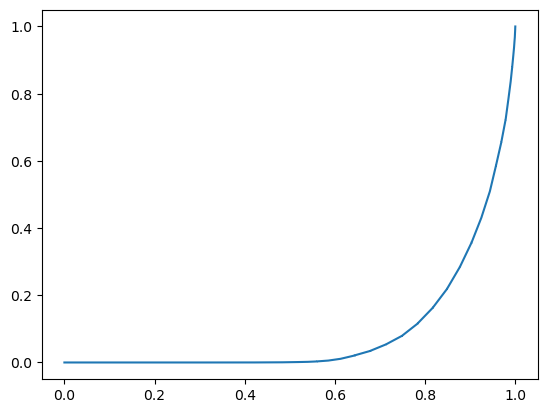


ROC-Curve for 1



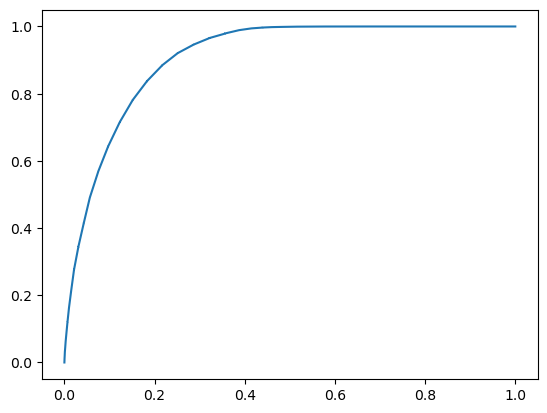

CPU times: user 35.1 s, sys: 819 ms, total: 35.9 s
Wall time: 36.9 s


In [1485]:

%%time
# mymodel = xgb.XGBClassifier()
mymodel=RandomForestClassifier()
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess), # preprocessing
    ('mlmodel',mymodel) #ML-Modeling - the will be taken from the variable mymodel
    ])
model_eval(Bala_X,val_X,Bala_y,val_y,model_pipeline)